In [168]:
import numpy as np
import seaborn as sns
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
from Analysis_Utils import preprocessing_df as preprocessing
from Analysis_Utils import query_df
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import cv2
import h5py
from sys import exit
import glob
import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline
from scipy.interpolate import CubicSpline
from scipy.signal import medfilt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import seaborn as sn
import matplotlib.pyplot as plt

In [169]:
%matplotlib notebook

In [170]:
kin = pd.read_hdf('/Users/harnoor_dhingra/Desktop/Project Thesis/FINAL PIPELINE/RM16_kinematics.h5')

In [171]:
hdf = pd.read_hdf('/Users/harnoor_dhingra/Desktop/Project Thesis/FINAL PIPELINE/default_save.h5')
hdf = hdf.reset_index(drop=True)

In [172]:
# Sorting and Multi-Indexing
df = hdf.sort_values(['rat', 'Date', 'S'])
df = df.set_index(['rat', 'Date', 'S'])

In [173]:
# Appending the number of Successful Trials column
df_1 = df['SF'].apply(pd.Series)
df_1 = df_1.rename(columns = lambda x : 'SF_' + str(x))
df_numSF_t = df_1.T
df_numSF_t.loc['Number of successful trials'] = df_numSF_t.count()
df_numSF = df_numSF_t.T
df['NSF'] = df_numSF['Number of successful trials'].astype(int)
# df.head()

In [174]:
# Appending the number of Total trials
df_r_start_1 = df['r_start'].apply(pd.Series)
df_r_start_1 = df_r_start_1.rename(columns = lambda x : 'r_start' + str(x))
df_r_start_t = df_r_start_1.T
df_r_start_t.loc['Total trials'] = df_r_start_t.count()
df_r_start = df_r_start_t.T
df['Total Trials'] = df_r_start['Total trials'].astype(int)
#df

## Get Single Trials Functions

In [175]:
def get_single_trial_robot(df,date,session,rat):
    new_df = df.loc[(rat, date, session)].to_frame()
    return new_df.T

ddv1 = get_single_trial_robot(df,'0190920','S3','RM16')
ddv1.head()

dim  \
RM16 0190920 S3  /home/pns/rat_reaching/scripts/9pt_pidiv3_cone...   

                                                              time  \
RM16 0190920 S3  [19.63243318646755, 19.658433209355735, 19.730...   

                                                           m_start  \
RM16 0190920 S3  [39.224433194096946, 105.84643341153469, 124.9...   

                                                            m_stop  \
RM16 0190920 S3  [43.230433236058616, 111.41943336575832, 128.6...   

                                                                SF  \
RM16 0190920 S3  [1, 2, 3, 4, 6, 7, 8, 10, 17, 18, 19, 20, 21, ...   

                                                               t_m  \
RM16 0190920 S3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                              lick  \
RM16 0190920 S3  [0.0, 108.42176666666667, 108.4302, 108.7308, ...   

                                                               r_x  \
RM16 0190920 S3  [3.3704456904627804, 2.530724278214131, 2.9931...   

                                                               r_y  \
RM16 0190920 S3  [3.7926184048807423, 3.2372740127493387, 2.989...   

                                                               r_z  ...  \
RM16 0190920 S3  [3.248371652558793, 2.504829785325406, 1.39090...  ...   

                                                               z_p    x0   y0  \
RM16 0190920 S3  438.9 625.5 581.6 714.1 525.8 652.6 521.6 525....  1024  608   

                  z0                                             moving  \
RM16 0190920 S3  531  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                RW  \
RM16 0190920 S3  0        0
1        0
2        0
3        0
4 ...   

                                                           r_start  \
RM16 0190920 S3  [2753, 12174, 14881, 16186, 17211, 18954, 2314...   

                                                            r_stop NSF  \
RM16 0190920 S3  [3317, 12957, 15401, 16787, 17765, 19536, 2369...  36   

                Total Trials  
RM16 0190920 S3           50  

[1 rows x 22 columns]

In [176]:
def get_single_trial_kin(df,date,session,rat):
    new_df = kin.loc[(rat, date, session)].round(3)
    return new_df

ddv2 = get_single_trial_kin(hdf,'0190920','S3','RM16')
ddv2 = ddv2.reset_index()
ddv2.head()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


bodyparts dim Handle                                                   \
coords             X      Y      Z prob_x prob_y prob_z   rmse      n   
0           0 -0.021 -0.032 -0.021 -0.028 -0.020 -0.029 -0.020 -0.021   
1           0 -0.033 -0.042 -0.036 -0.042 -0.034 -0.038 -0.059 -0.058   
2           0 -0.033 -0.042 -0.036 -0.042 -0.034 -0.039 -0.059 -0.058   
3           0 -0.033 -0.042 -0.036 -0.035 -0.034 -0.039 -0.059 -0.058   
4           0 -0.033 -0.042 -0.036 -0.036 -0.034 -0.039 -0.059 -0.059   

bodyparts B Handle  ... Fourth Base 2      Fourth tip 2                   \
coords           X  ...          rmse    n            X    Y    Z prob_x   
0           -0.017  ...           0.0  0.0          0.0  0.0  0.0    0.0   
1           -0.057  ...           0.0  0.0          0.0  0.0  0.0    0.0   
2           -0.057  ...           0.0  0.0          0.0  0.0  0.0    0.0   
3           -0.057  ...           0.0  0.0          0.0  0.0  0.0    0.0   
4           -0.057  ...           0.0  0.0          0.0  0.0  0.0    0.0   

bodyparts                          
coords    prob_y prob_z rmse    n  
0            0.0    0.0  0.0  0.0  
1            0.0    0.0  0.0  0.0  
2            0.0    0.0  0.0  0.0  
3            0.0    0.0  0.0  0.0  
4            0.0    0.0  0.0  0.0  

[5 rows x 217 columns]

## Robot Dataframe and Kinematic Dataframe Exploration

In [177]:
# time column

df_time = ddv1['time'].apply(pd.Series) # expanding df.time into its own dataframe
df_time = df_time.rename(columns = lambda x : 'time_' + str(x)) # renaming each variable
df_time # viewing the time dataframe

time_0     time_1     time_2     time_3     time_4  \
RM16 0190920 S3  19.632433  19.658433  19.730433  19.738433  19.747433   

                    time_5     time_6     time_7     time_8     time_9  ...  \
RM16 0190920 S3  19.755433  19.762433  19.769433  19.777433  19.784433  ...   

                 time_95161  time_95162  time_95163  time_95164  time_95165  \
RM16 0190920 S3  689.964433  689.972433  689.979433  689.986433  689.993433   

                 time_95166  time_95167  time_95168  time_95169  time_95170  
RM16 0190920 S3  689.999433  690.008433  690.014433  690.021433  690.028433  

[1 rows x 95171 columns]

In [178]:
# lick column
df_lick = ddv1['lick'].apply(pd.Series)
df_lick = df_lick.rename(columns = lambda x : 'lick_' + str(x))
#df_lick = df_lick.astype(int)
df_lick.head()

lick_0      lick_1    lick_2    lick_3      lick_4  \
RM16 0190920 S3     0.0  108.421767  108.4302  108.7308  108.738967   

                     lick_5      lick_6      lick_7    lick_8    lick_9  ...  \
RM16 0190920 S3  108.883233  108.914967  109.042633  109.0888  109.0941  ...   

                  lick_2156   lick_2157  lick_2158   lick_2159  lick_2160  \
RM16 0190920 S3  686.402033  686.513267   686.5788  686.704133   686.7663   

                  lick_2161   lick_2162   lick_2163   lick_2164   lick_2165  
RM16 0190920 S3  686.904533  686.959067  686.959633  686.962567  689.524267  

[1 rows x 2166 columns]

In [179]:
# m_start column
df_m_start = ddv1['m_start'].apply(pd.Series)
df_m_start = df_m_start.rename(columns = lambda x : 'm_start_' + str(x))
df_m_start
# m_stop column
df_m_stop = ddv1['m_stop'].apply(pd.Series)
df_m_stop = df_m_stop.rename(columns = lambda x : 'm_stop_' + str(x))
df_m_stop
df_m_start_float = df_m_start.astype(float)
df_m_stop_float = df_m_stop.astype(float)
start_time_arr = np.array(ddv1['m_start'].apply(pd.Series).reset_index().T.reset_index()[0][3:].reset_index()[0])
stop_time_arr = np.array(ddv1['m_stop'].apply(pd.Series).reset_index().T.reset_index()[0][3:].reset_index()[0])
lick_arr = np.array(ddv1['lick'].apply(pd.Series).reset_index().T.reset_index()[0][3:].reset_index()[0])
print(type(lick_arr))

<class 'numpy.ndarray'>


In [180]:
# r_start column
df_r_start = ddv1['r_start'].apply(pd.Series)
df_r_start = df_r_start.rename(columns = lambda x : 'r_start' + str(x))
# df_r_start

# r_stop column
df_r_stop = ddv1['r_stop'].apply(pd.Series)
df_r_stop = df_r_stop.rename(columns = lambda x : 'r_stop' + str(x))
# df_r_stop

<IPython.core.display.Javascript object>


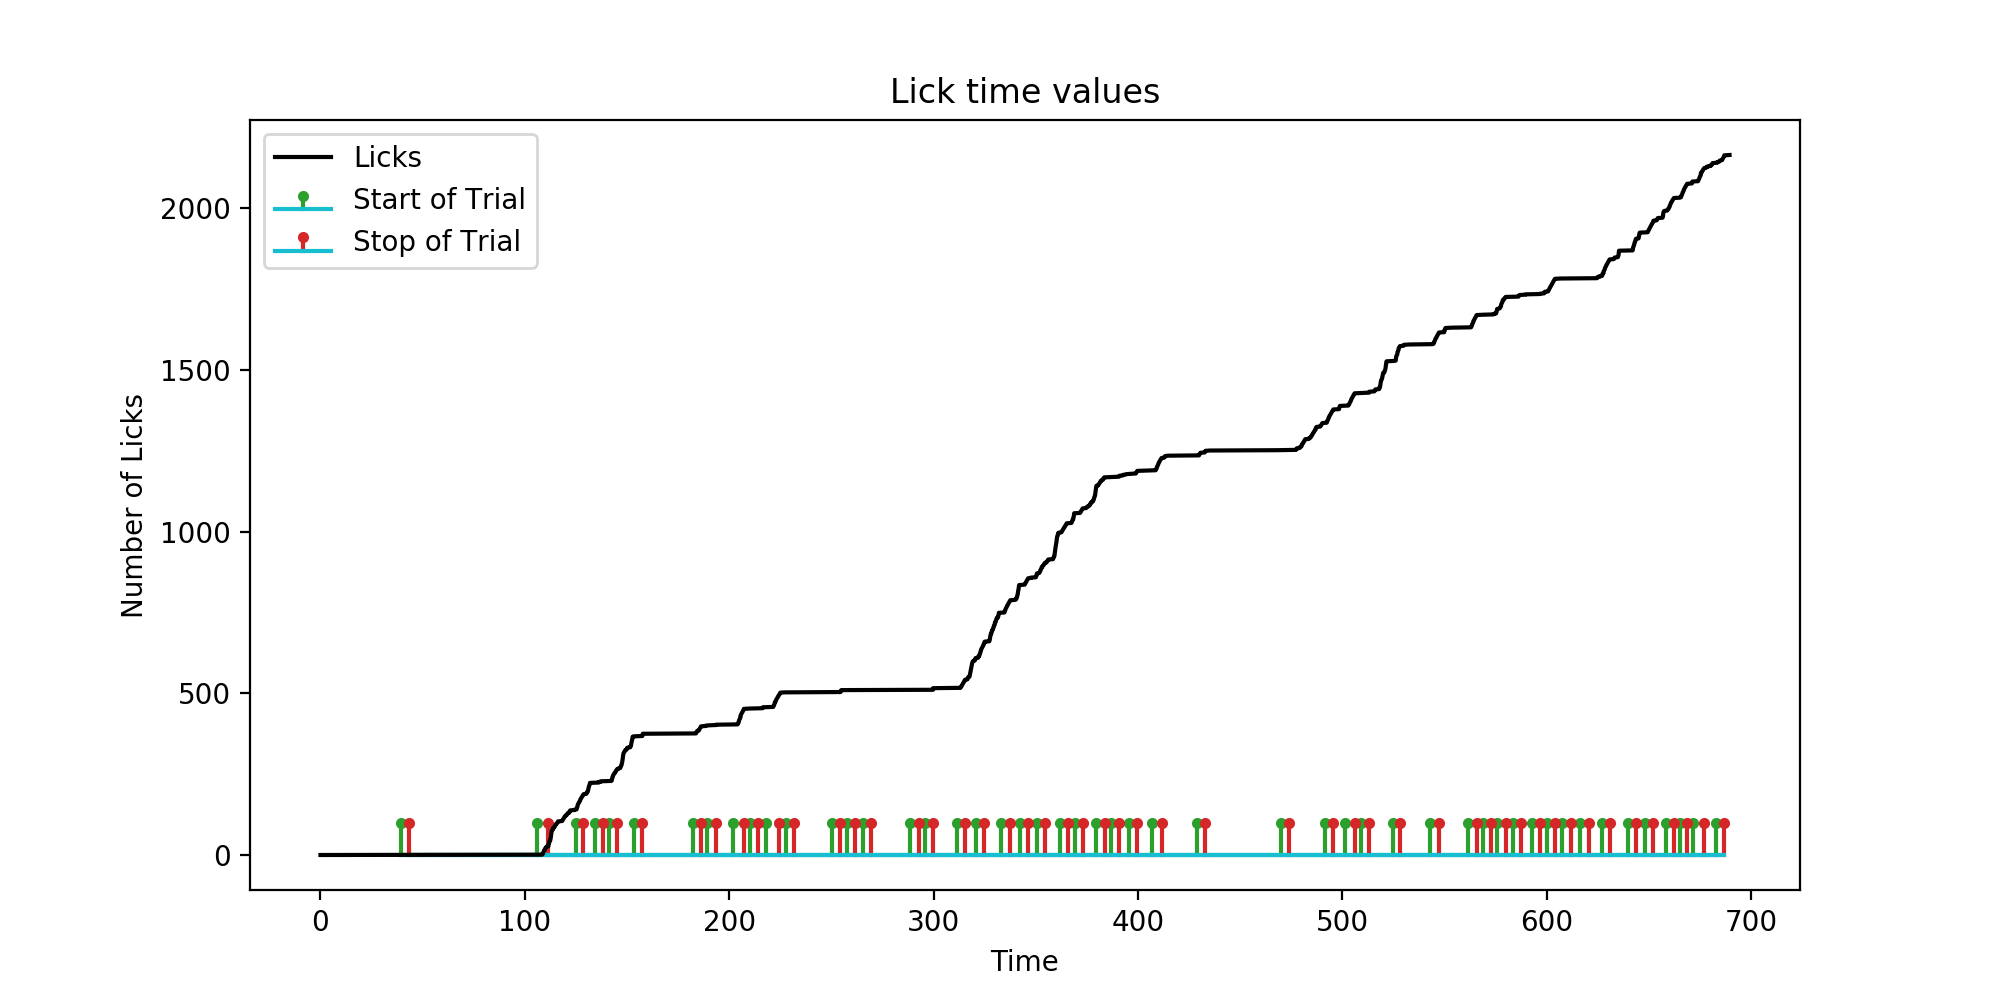

In [181]:
import matplotlib.pyplot as plt
number = range(2166)
y = [100] * start_time_arr.size
y = np.array(y)
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 1, 1)
plt.title('Lick time values')
plt.xlabel('Time')
plt.ylabel('Number of Licks')
plt.stem(start_time_arr, y, linefmt = 'C2-', markerfmt = 'C2.' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr, y, linefmt = 'C3-', markerfmt = 'C3.' ,basefmt = 'C9-', label = 'Stop of Trial') 
plt.plot(lick_arr, number, label = 'Licks', color = 'black')
plt.legend()

## Motion Detection:
##### dvr-scan -i Harnoor2019-09-20S3_cam2.mp4 -so -t 0.05 -tp 00:00:10.0000 >> out_full_val.txt

In [182]:
myfile = open("out_full_label_val.txt")
txt = myfile.read()
print(txt)

00:00:00.040,00:00:10.200,00:00:22.840,00:00:37.920,00:01:38.560,00:02:30.320,00:07:59.200,00:13:20.920,00:15:19.760,00:20:58.440,00:21:44.080,00:24:15.400,00:24:18.040,00:24:46.760,00:25:19.320,00:26:49.560,00:27:29.880,00:39:19.080,00:41:42.320,00:41:55.400,00:42:20.760,00:49:14.240,00:49:22.320,01:03:26.840



In [183]:
pre_list_time = txt.split("\n")
pre_list_time[0]

'00:00:00.040,00:00:10.200,00:00:22.840,00:00:37.920,00:01:38.560,00:02:30.320,00:07:59.200,00:13:20.920,00:15:19.760,00:20:58.440,00:21:44.080,00:24:15.400,00:24:18.040,00:24:46.760,00:25:19.320,00:26:49.560,00:27:29.880,00:39:19.080,00:41:42.320,00:41:55.400,00:42:20.760,00:49:14.240,00:49:22.320,01:03:26.840'

In [184]:
list_time = pre_list_time[0].split(",")

In [185]:
start_time_org = []
end_time_org = []
start_time = []
end_time = []

In [186]:
for i in range(0, len(list_time)):
    # print(i)
    if(i%2 == 0):
        start_time_org.append(list_time[i])
        start_time.append(list_time[i])
    else:
        end_time_org.append(list_time[i])
        end_time.append(list_time[i])

In [187]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(float(s))

In [188]:
for i in range(len(start_time_org)):
    start_time[i] = get_sec(start_time_org[i])

In [189]:
for i in range(len(end_time)):
    end_time[i] = get_sec(end_time_org[i])

In [190]:
df = pd.DataFrame({'Start Time Org': start_time_org, 'End Time Org': end_time_org, 'Start Time': start_time, 'End Time': end_time,}) 
#df

In [191]:
df['End Time'] = df['End Time'] - 10
# df['End Time Org'] = df['End Time Org'] - 10
# df

In [192]:
df = df[df['End Time'] - df['Start Time'] >= 5]
df

Start Time Org  End Time Org  Start Time  End Time
1    00:00:22.840  00:00:37.920          22        27
2    00:01:38.560  00:02:30.320          98       140
3    00:07:59.200  00:13:20.920         479       790
4    00:15:19.760  00:20:58.440         919      1248
5    00:21:44.080  00:24:15.400        1304      1445
6    00:24:18.040  00:24:46.760        1458      1476
7    00:25:19.320  00:26:49.560        1519      1599
8    00:27:29.880  00:39:19.080        1649      2349
10   00:42:20.760  00:49:14.240        2540      2944
11   00:49:22.320  01:03:26.840        2962      3796

<IPython.core.display.Javascript object>


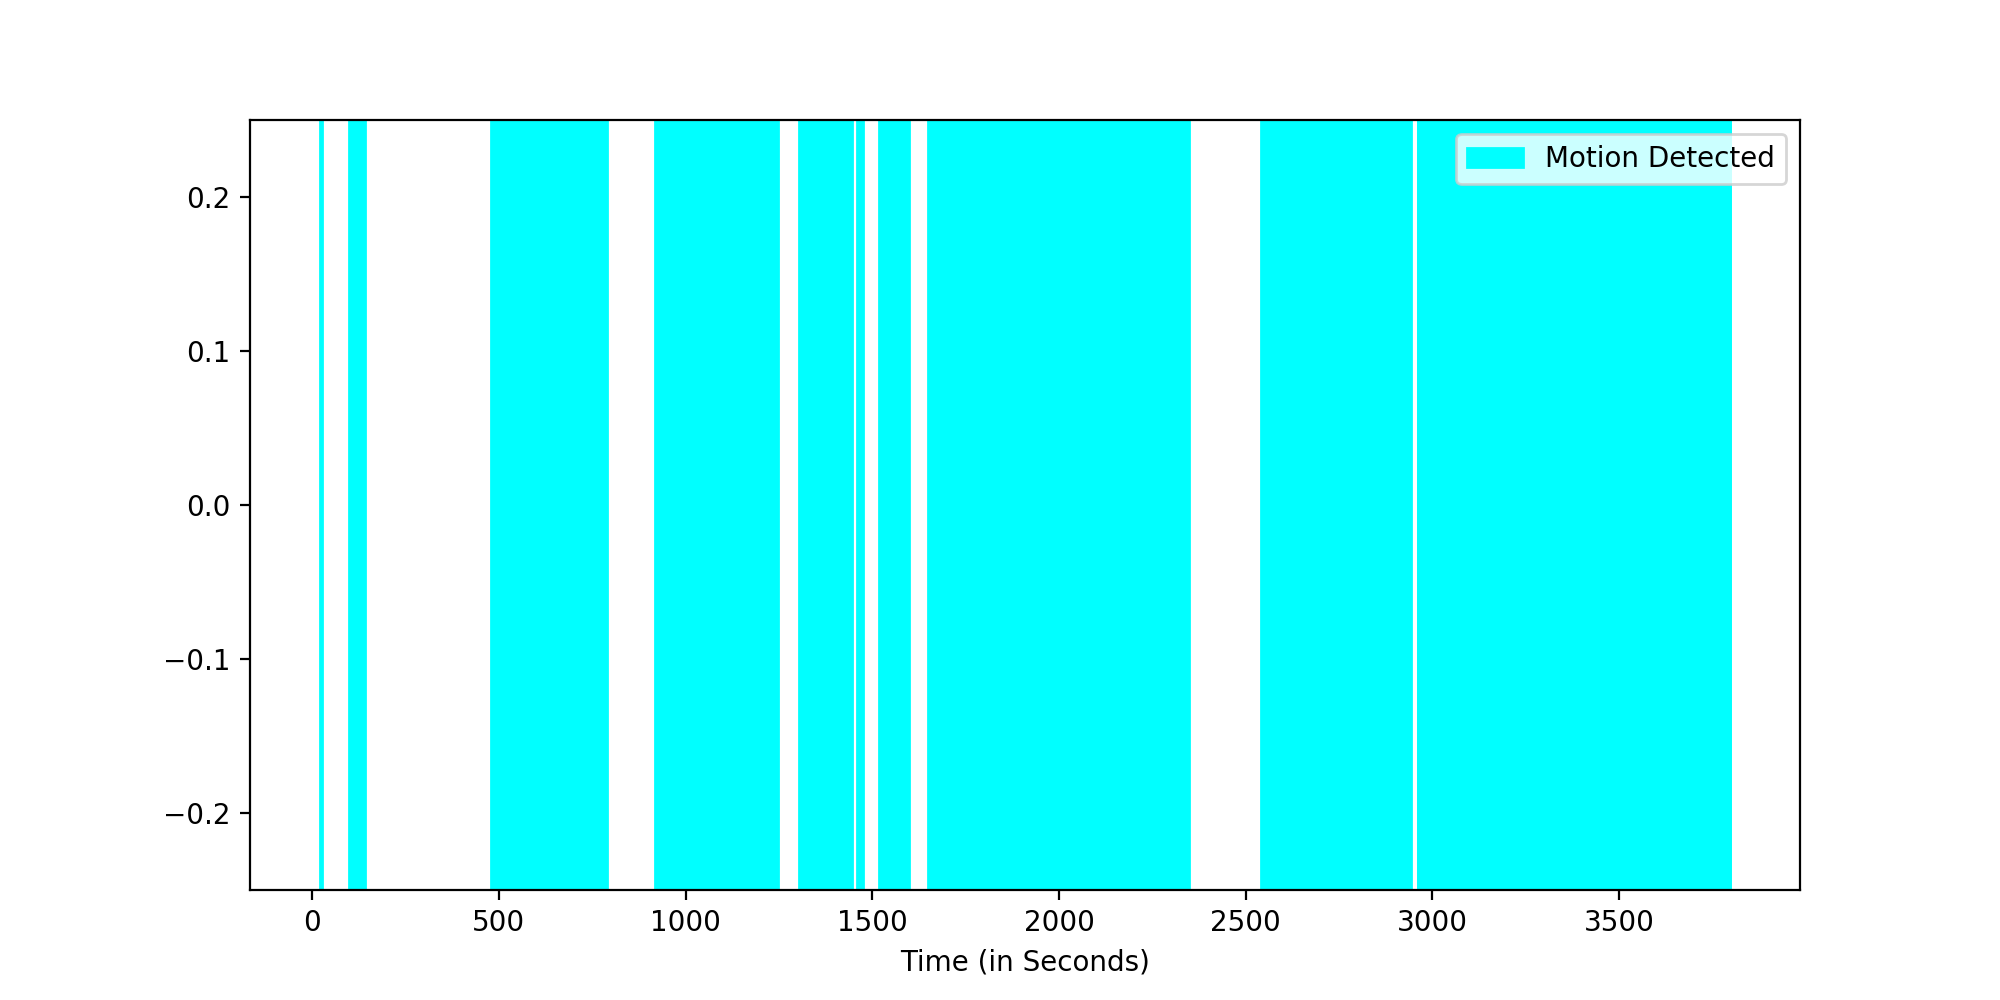

In [193]:
fig, ax = plt.subplots(figsize = (10,5))

for x_1 , x_2 in zip(df['Start Time'].values ,df['End Time'].values):
    ax.add_patch(plt.Rectangle((x_1,-0.25),x_2-x_1,0.5, color = '#00FFFF'))

ax.add_patch(plt.Rectangle((x_1,-0.25),x_2-x_1,0.5, color = '#00FFFF', label = 'Motion Detected'))
ax.autoscale()
ax.set_ylim(-0.25,0.25)
plt.xlabel('Time (in Seconds)')
plt.legend()
plt.show()

In [194]:
trials_frames = pd.DataFrame()
trials_frames['start'] = df_r_start.reset_index().T.reset_index()[0][3:].reset_index()[0]
trials_frames['stop'] = df_r_stop.reset_index().T.reset_index()[0][3:].reset_index()[0]

trials_frames['start_s'] = trials_frames['start']
trials_frames['stop_s'] = trials_frames['stop']

for i in range(len(trials_frames)):
    trials_frames['start_s'][i] = (trials_frames['start'][i]/25)
    trials_frames['stop_s'][i] = (trials_frames['stop'][i]/25)
trials_frames

start   stop  start_s   stop_s
0    2753   3317   110.12   132.68
1   12174  12957   486.96   518.28
2   14881  15401   595.24   616.04
3   16186  16787   647.44   671.48
4   17211  17765   688.44    710.6
5   18954  19536   758.16   781.44
6   23141  23697   925.64   947.88
7   24110  24682    964.4   987.28
8   25925  26661     1037  1066.44
9   27076  27632  1083.04  1105.28
10  28169  29109  1126.76  1164.36
11  29534  30098  1181.36  1203.92
12  32748  33299  1309.92  1331.96
13  33713  34266  1348.52  1370.64
14  34799  35352  1391.96  1414.08
15  38071  38639  1522.84  1545.56
16  39064  39627  1562.56  1585.08
17  41364  41957  1654.56  1678.28
18  42728  43279  1709.12  1731.16
19  44435  45081   1777.4  1803.24
20  45748  46305  1829.92   1852.2
21  46883  47446  1875.32  1897.84
22  48461  49018  1938.44  1960.72
23  49469  50028  1978.76  2001.12
24  50952  51513  2038.08  2060.52
25  51937  52499  2077.48  2099.96
26  53186  53745  2127.44   2149.8
27  54799  55440  2191.96   2217.6
28  57835  58398   2313.4  2335.92
29  63608  64184  2544.32  2567.36
30  66731  67299  2669.24  2691.96
31  68106  68793  2724.24  2751.72
32  69241  69818  2769.64  2792.72
33  71507  71988  2860.28  2879.52
34  74106  74736  2964.24  2989.44
35  76768  77391  3070.72  3095.64
36  77820  78393   3112.8  3135.72
37  78826  79398  3153.04  3175.92
38  79912  80488  3196.48  3219.52
39  81235  81809   3249.4  3272.36
40  82289  82852  3291.56  3314.08
41  83390  83963   3335.6  3358.52
42  84652  85220  3386.08   3408.8
43  86129  86689  3445.16  3467.56
44  87985  88565   3519.4   3542.6
45  89191  89767  3567.64  3590.68
46  90647  91203  3625.88  3648.12
47  91635  92137   3665.4  3685.48
48  92563  93317  3702.52  3732.68
49  94159  94733  3766.36  3789.32

In [195]:
extra_trials = pd.DataFrame()

data1 = np.array([5546, 7771, 21090, 60900])
s1 = pd.Series(data1)

data2 = np.array([6038, 8414, 21683, 61503])
s2 = pd.Series(data2)

extra_trials['start'] = s1
extra_trials['stop'] = s2

extra_trials['start_s'] = extra_trials['start']
extra_trials['stop_s'] = extra_trials['stop']

for i in range(len(extra_trials)):
    extra_trials['start_s'][i] = (extra_trials['start'][i]/25)
    extra_trials['stop_s'][i] = (extra_trials['stop'][i]/25)
extra_trials

start   stop  start_s  stop_s
0   5546   6038      221     241
1   7771   8414      310     336
2  21090  21683      843     867
3  60900  61503     2436    2460

In [196]:
xy = trials_frames.append(extra_trials)

In [197]:
trials_frames = xy.sort_values(by=['start']).reset_index()

In [198]:
trials_frames = trials_frames.drop(['index'], axis = 1)

In [199]:
trials_frames

start   stop  start_s   stop_s
0    2753   3317   110.12   132.68
1    5546   6038      221      241
2    7771   8414      310      336
3   12174  12957   486.96   518.28
4   14881  15401   595.24   616.04
5   16186  16787   647.44   671.48
6   17211  17765   688.44    710.6
7   18954  19536   758.16   781.44
8   21090  21683      843      867
9   23141  23697   925.64   947.88
10  24110  24682    964.4   987.28
11  25925  26661     1037  1066.44
12  27076  27632  1083.04  1105.28
13  28169  29109  1126.76  1164.36
14  29534  30098  1181.36  1203.92
15  32748  33299  1309.92  1331.96
16  33713  34266  1348.52  1370.64
17  34799  35352  1391.96  1414.08
18  38071  38639  1522.84  1545.56
19  39064  39627  1562.56  1585.08
20  41364  41957  1654.56  1678.28
21  42728  43279  1709.12  1731.16
22  44435  45081   1777.4  1803.24
23  45748  46305  1829.92   1852.2
24  46883  47446  1875.32  1897.84
25  48461  49018  1938.44  1960.72
26  49469  50028  1978.76  2001.12
27  50952  51513  2038.08  2060.52
28  51937  52499  2077.48  2099.96
29  53186  53745  2127.44   2149.8
30  54799  55440  2191.96   2217.6
31  57835  58398   2313.4  2335.92
32  60900  61503     2436     2460
33  63608  64184  2544.32  2567.36
34  66731  67299  2669.24  2691.96
35  68106  68793  2724.24  2751.72
36  69241  69818  2769.64  2792.72
37  71507  71988  2860.28  2879.52
38  74106  74736  2964.24  2989.44
39  76768  77391  3070.72  3095.64
40  77820  78393   3112.8  3135.72
41  78826  79398  3153.04  3175.92
42  79912  80488  3196.48  3219.52
43  81235  81809   3249.4  3272.36
44  82289  82852  3291.56  3314.08
45  83390  83963   3335.6  3358.52
46  84652  85220  3386.08   3408.8
47  86129  86689  3445.16  3467.56
48  87985  88565   3519.4   3542.6
49  89191  89767  3567.64  3590.68
50  90647  91203  3625.88  3648.12
51  91635  92137   3665.4  3685.48
52  92563  93317  3702.52  3732.68
53  94159  94733  3766.36  3789.32

In [200]:
start_time_arr = np.array(trials_frames['start_s'])
stop_time_arr = np.array(trials_frames['stop_s'])

In [201]:
start_time_arr_f = np.array(trials_frames['start'])
stop_time_arr_f = np.array(trials_frames['stop'])

<IPython.core.display.Javascript object>


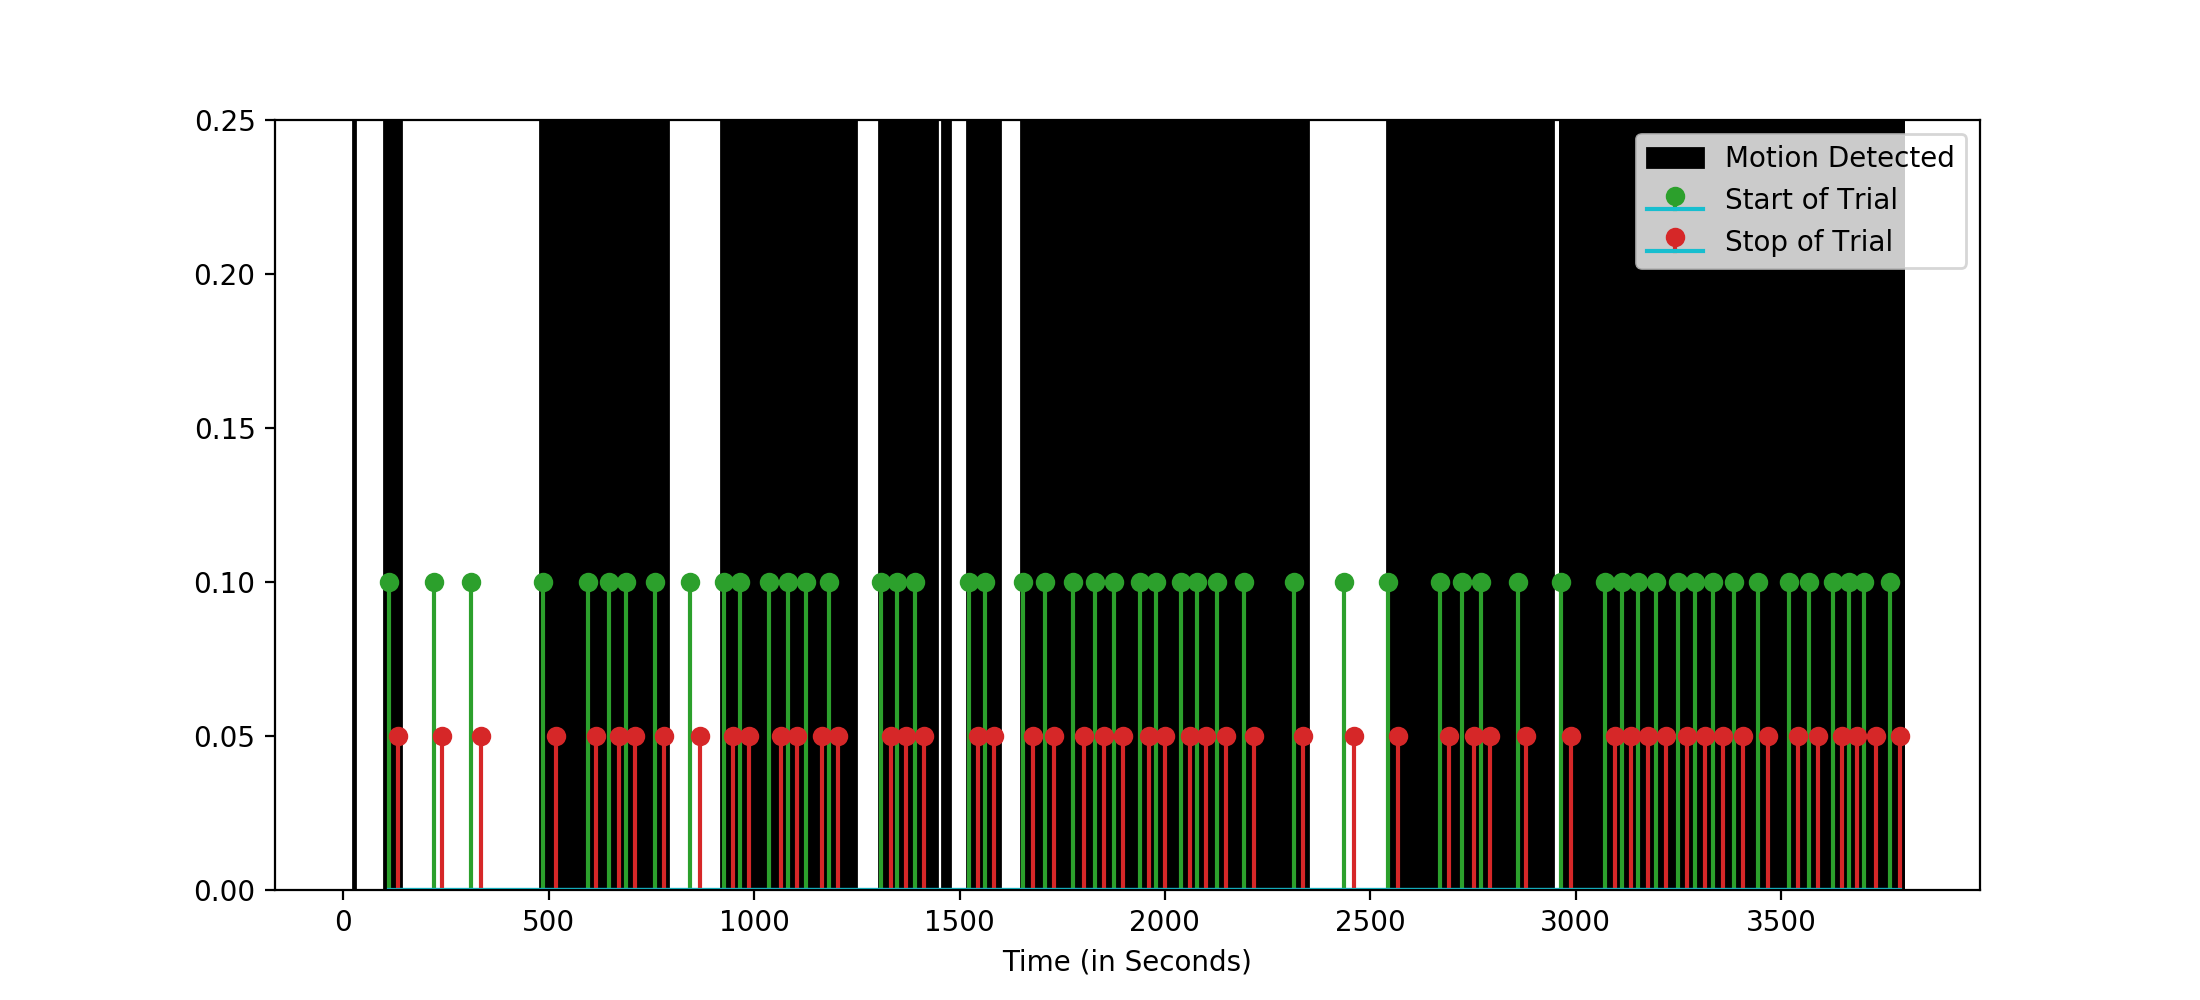

In [202]:
fig, ax = plt.subplots(figsize = (11,5))
y1 = [0.1] * start_time_arr.size
y2 = [0.05] * start_time_arr.size
y1 = np.array(y1)
y2 = np.array(y2)

for x_1 , x_2 in zip(df['Start Time'].values ,df['End Time'].values):
    ax.add_patch(plt.Rectangle((x_1,-0.25),x_2-x_1,0.5, color = '#000000'))

ax.add_patch(plt.Rectangle((x_1,-0.25),x_2-x_1,0.5, color = '#000000', label = 'Motion Detected'))
ax.autoscale()
ax.set_ylim(0,0.25)
plt.xlabel('Time (in Seconds)')
plt.stem(start_time_arr, y1, linefmt = 'C2-', markerfmt = 'C2o' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr, y2, linefmt = 'C3-', markerfmt = 'C3o' ,basefmt = 'C9-', label = 'Stop of Trial') 
plt.show()
plt.legend()
plt.savefig('out_full1.jpg')

## Manual Feature Exploration

## 1. Identification of NULL Trials

In [203]:
dlc_csv = pd.read_csv('DLCcam2filtered_coorindates.csv')

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [204]:
dlc_csv = dlc_csv[2:].astype(float)

In [205]:
prob_handle = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2']
prob_nose = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.8']
prob_palm1 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.20']
prob_palm2 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.56']

handle_x = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012']
palm1_x = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.18']
palm2_x = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.54']

handle_y = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.1']
palm1_y = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.19']
palm2_y = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.55']

In [206]:
frame_axis = range(0,len(prob_handle),1)

<IPython.core.display.Javascript object>


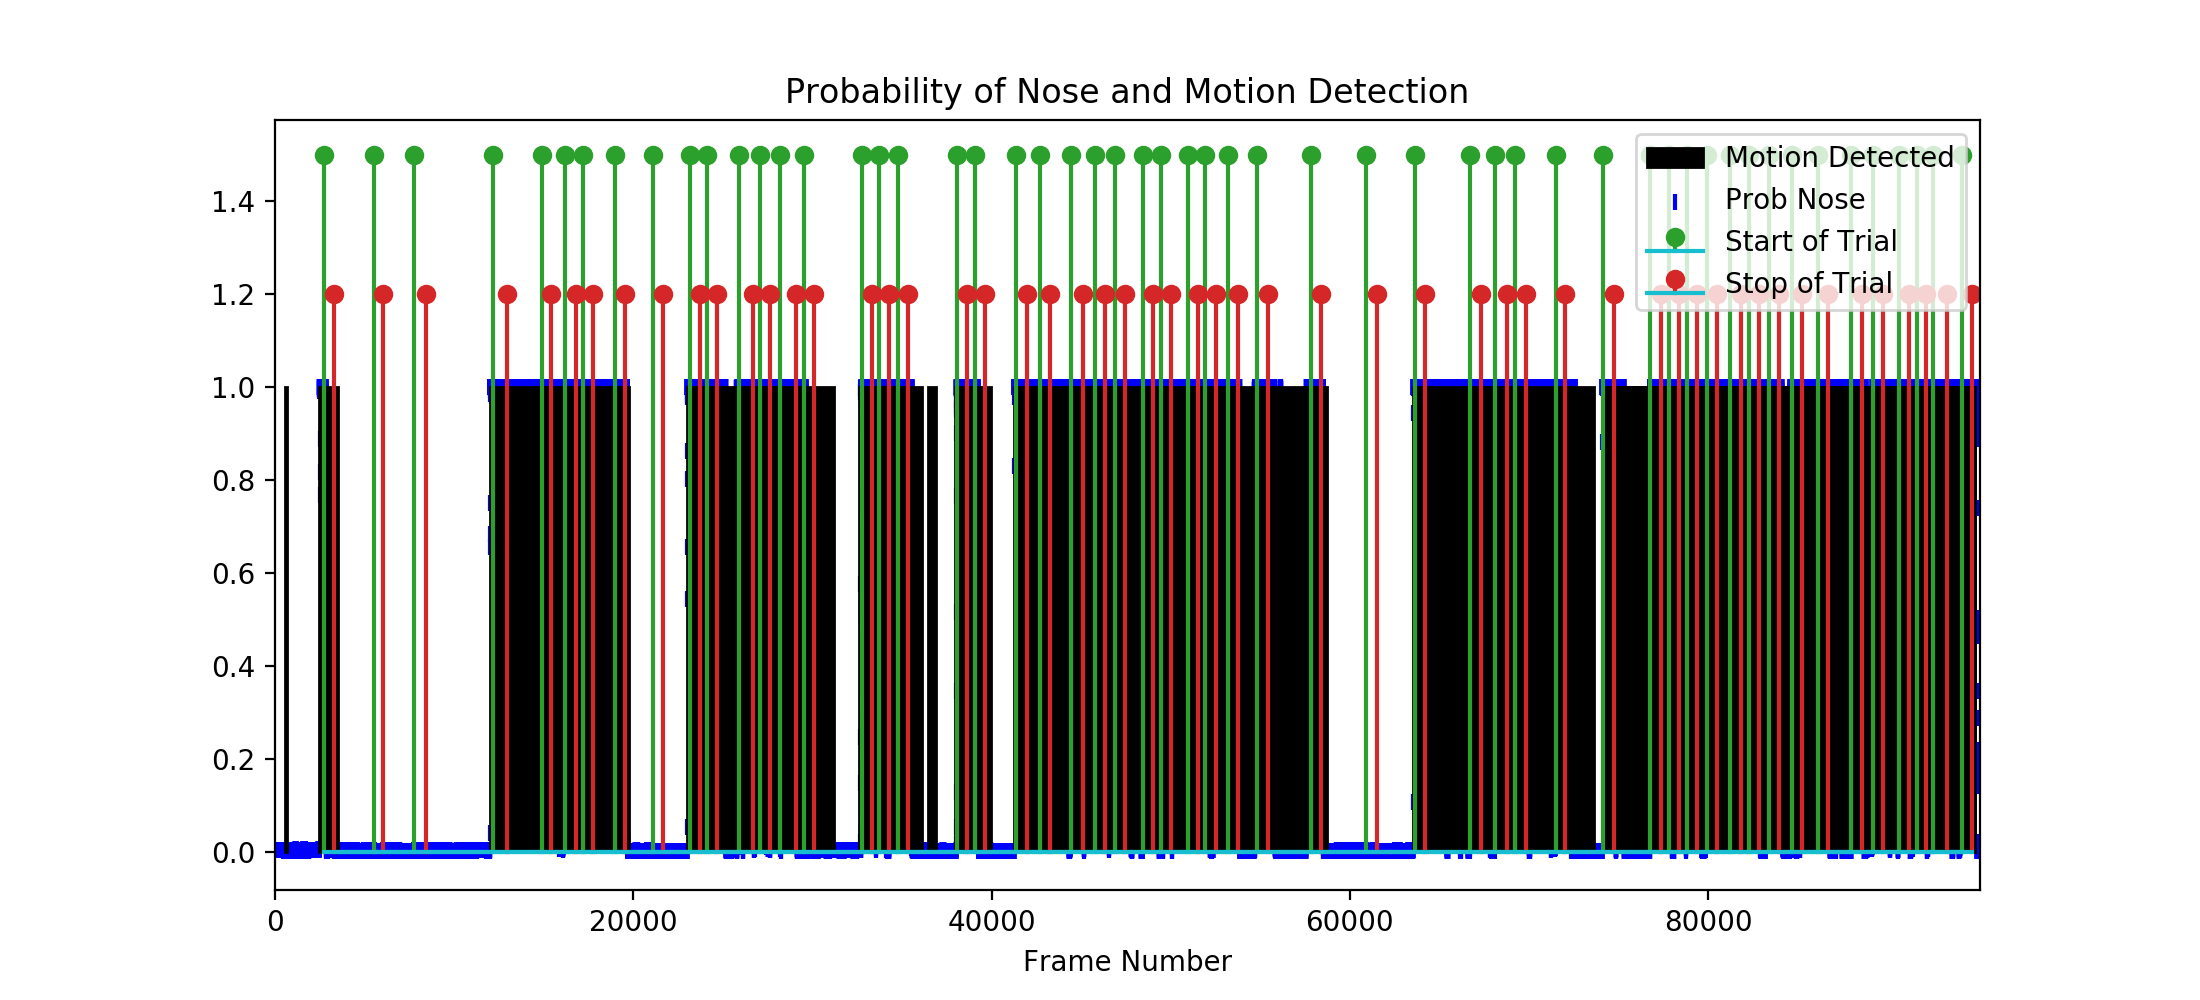

In [207]:
fig, ax = plt.subplots(figsize = (11,5))

plt.xlim(0, len(prob_handle))
y1 = [1.5] * start_time_arr.size
y2 = [1.2] * start_time_arr.size
y1 = np.array(y1)
y2 = np.array(y2)

plt.title('Probability of Nose and Motion Detection')
plt.scatter(frame_axis, prob_nose, marker = '|', c = 'b', label = 'Prob Nose')
# plt.scatter(frame_axis, prob_palm1, marker = '|', c = 'b', label = 'Prob Palm1')
# plt.scatter(frame_axis, prob_handle, marker = '|', c = 'g', label = 'Prob Handle')

plt.stem(start_time_arr_f, y1, linefmt = 'C2-', markerfmt = 'C2o' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr_f, y2, linefmt = 'C3-', markerfmt = 'C3o' ,basefmt = 'C9-', label = 'Stop of Trial')
plt.xlabel('Frame Number')
for x_1 , x_2 in zip(df['Start Time'].values*25 ,df['End Time'].values*25):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#000000'))
ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#000000', label = 'Motion Detected'))
plt.legend(loc = 1)

<IPython.core.display.Javascript object>


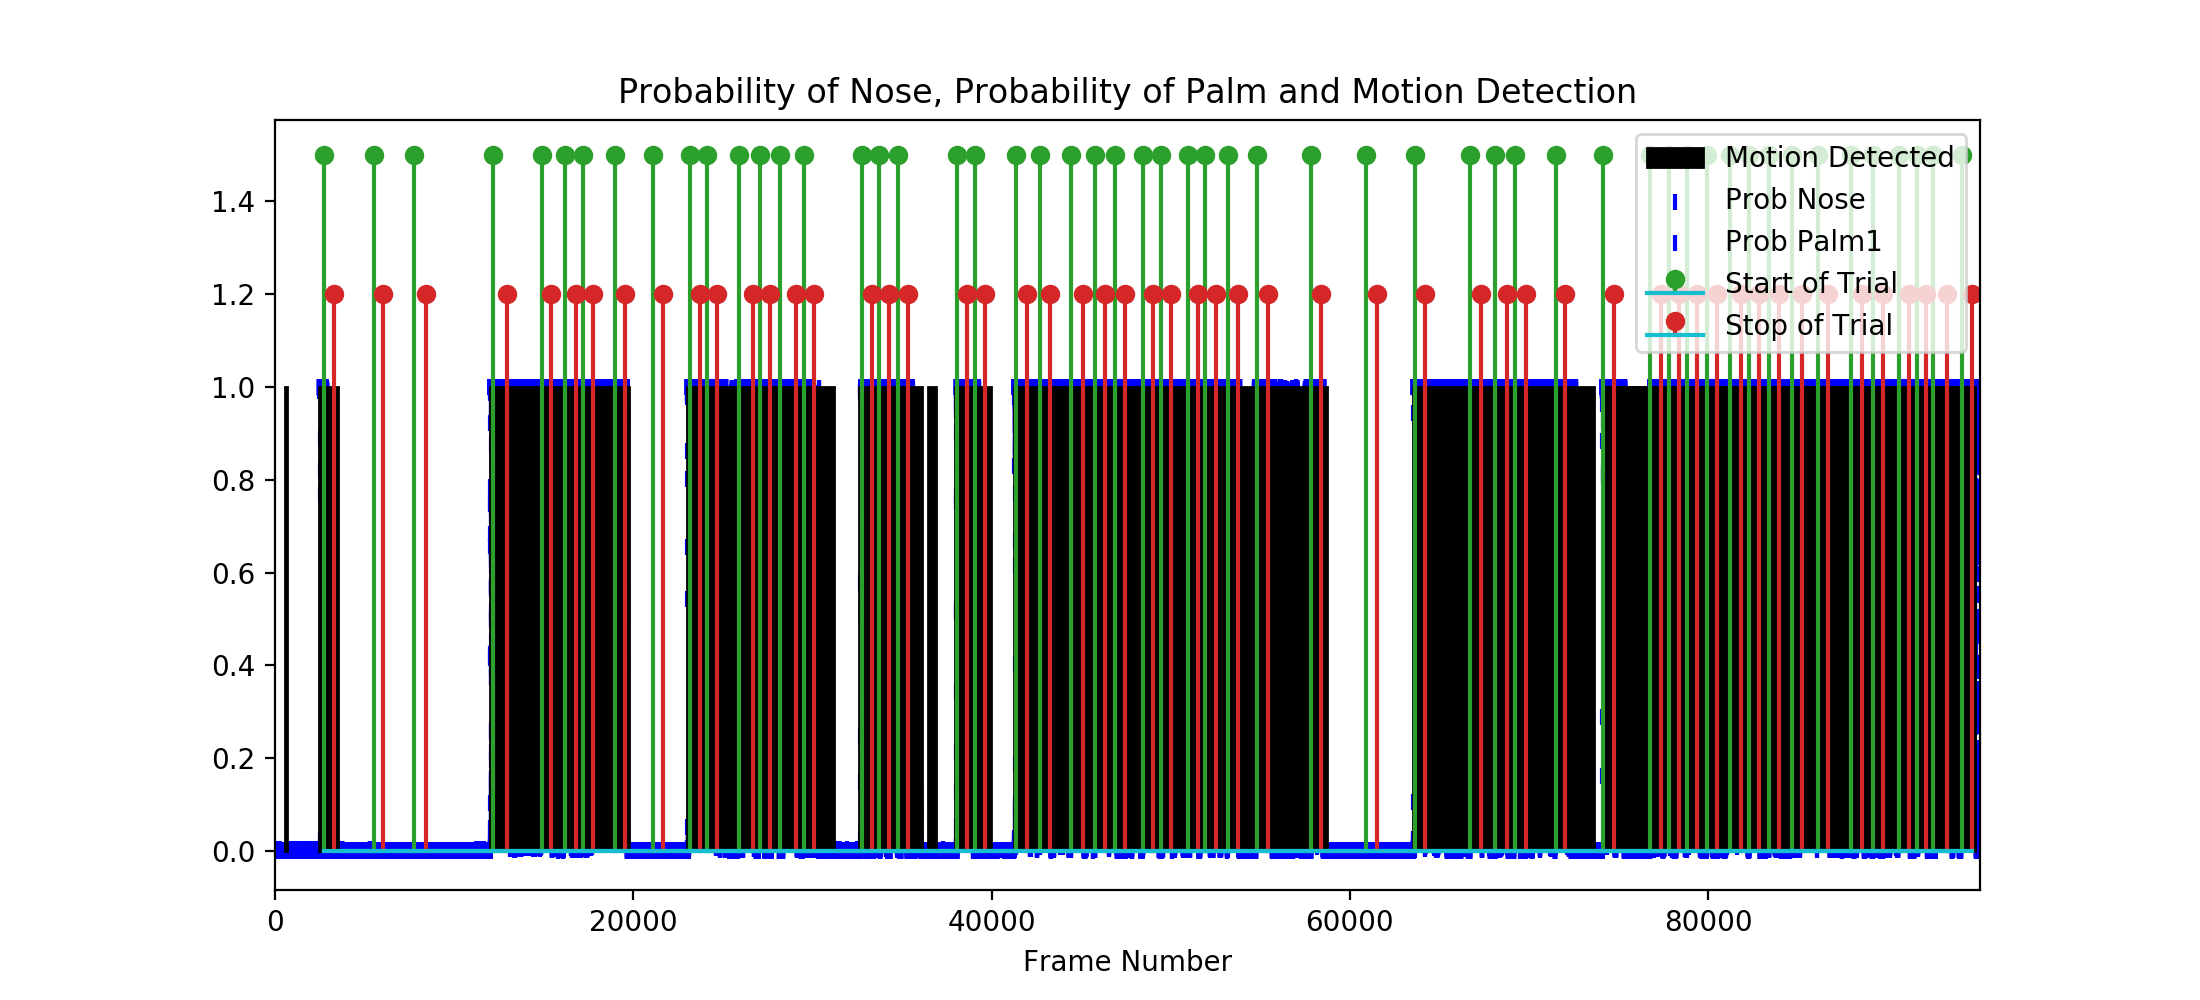

In [208]:
fig, ax = plt.subplots(figsize = (11,5))

plt.xlim(0, len(prob_handle))
y1 = [1.5] * start_time_arr.size
y2 = [1.2] * start_time_arr.size
y1 = np.array(y1)
y2 = np.array(y2)

plt.title('Probability of Nose, Probability of Palm and Motion Detection')
plt.scatter(frame_axis, prob_nose, marker = '|', c = 'b', label = 'Prob Nose')
plt.scatter(frame_axis, prob_palm1, marker = '|', c = 'b', label = 'Prob Palm1')
# plt.scatter(frame_axis, prob_handle, marker = '|', c = 'g', label = 'Prob Handle')

plt.stem(start_time_arr_f, y1, linefmt = 'C2-', markerfmt = 'C2o' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr_f, y2, linefmt = 'C3-', markerfmt = 'C3o' ,basefmt = 'C9-', label = 'Stop of Trial')
plt.xlabel('Frame Number')
for x_1 , x_2 in zip(df['Start Time'].values*25 ,df['End Time'].values*25):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#000000'))
ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#000000', label = 'Motion Detected'))
plt.legend(loc = 1)

<IPython.core.display.Javascript object>


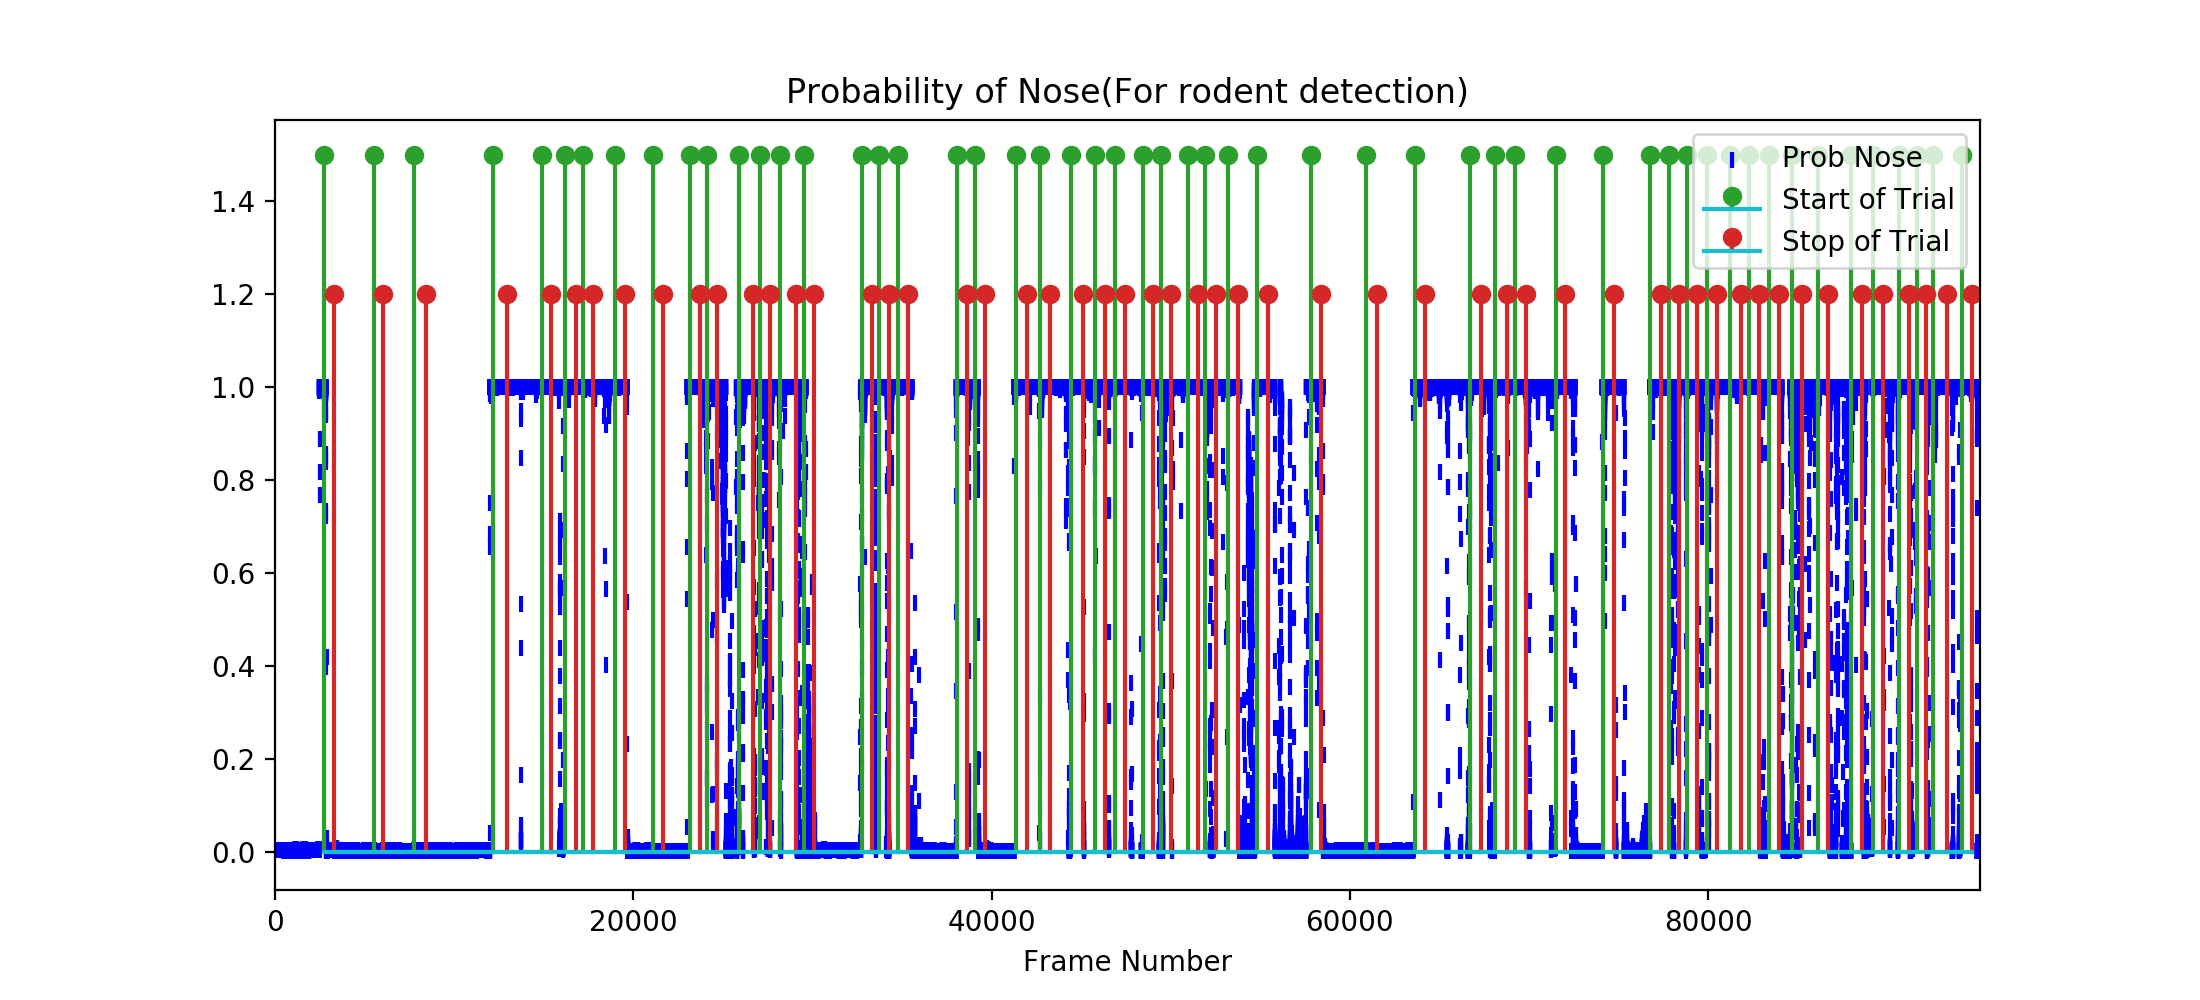

In [209]:
fig, ax = plt.subplots(figsize = (11,5))

plt.xlim(0, len(prob_handle))
y1 = [1.5] * start_time_arr.size
y2 = [1.2] * start_time_arr.size
y1 = np.array(y1)
y2 = np.array(y2)

plt.title('Probability of Nose(For rodent detection)')
plt.scatter(frame_axis, prob_nose, marker = '|', c = 'b', label = 'Prob Nose')
# plt.scatter(frame_axis, prob_handle, marker = '|', c = 'g', label = 'Prob Handle')

plt.stem(start_time_arr_f, y1, linefmt = 'C2-', markerfmt = 'C2o' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr_f, y2, linefmt = 'C3-', markerfmt = 'C3o' ,basefmt = 'C9-', label = 'Stop of Trial')
plt.xlabel('Frame Number')
plt.legend(loc = 1)
# for x_1 , x_2 in zip(df['Start Time'].values*25 ,df['End Time'].values*25):
#     ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#ADD8E6'))

<IPython.core.display.Javascript object>


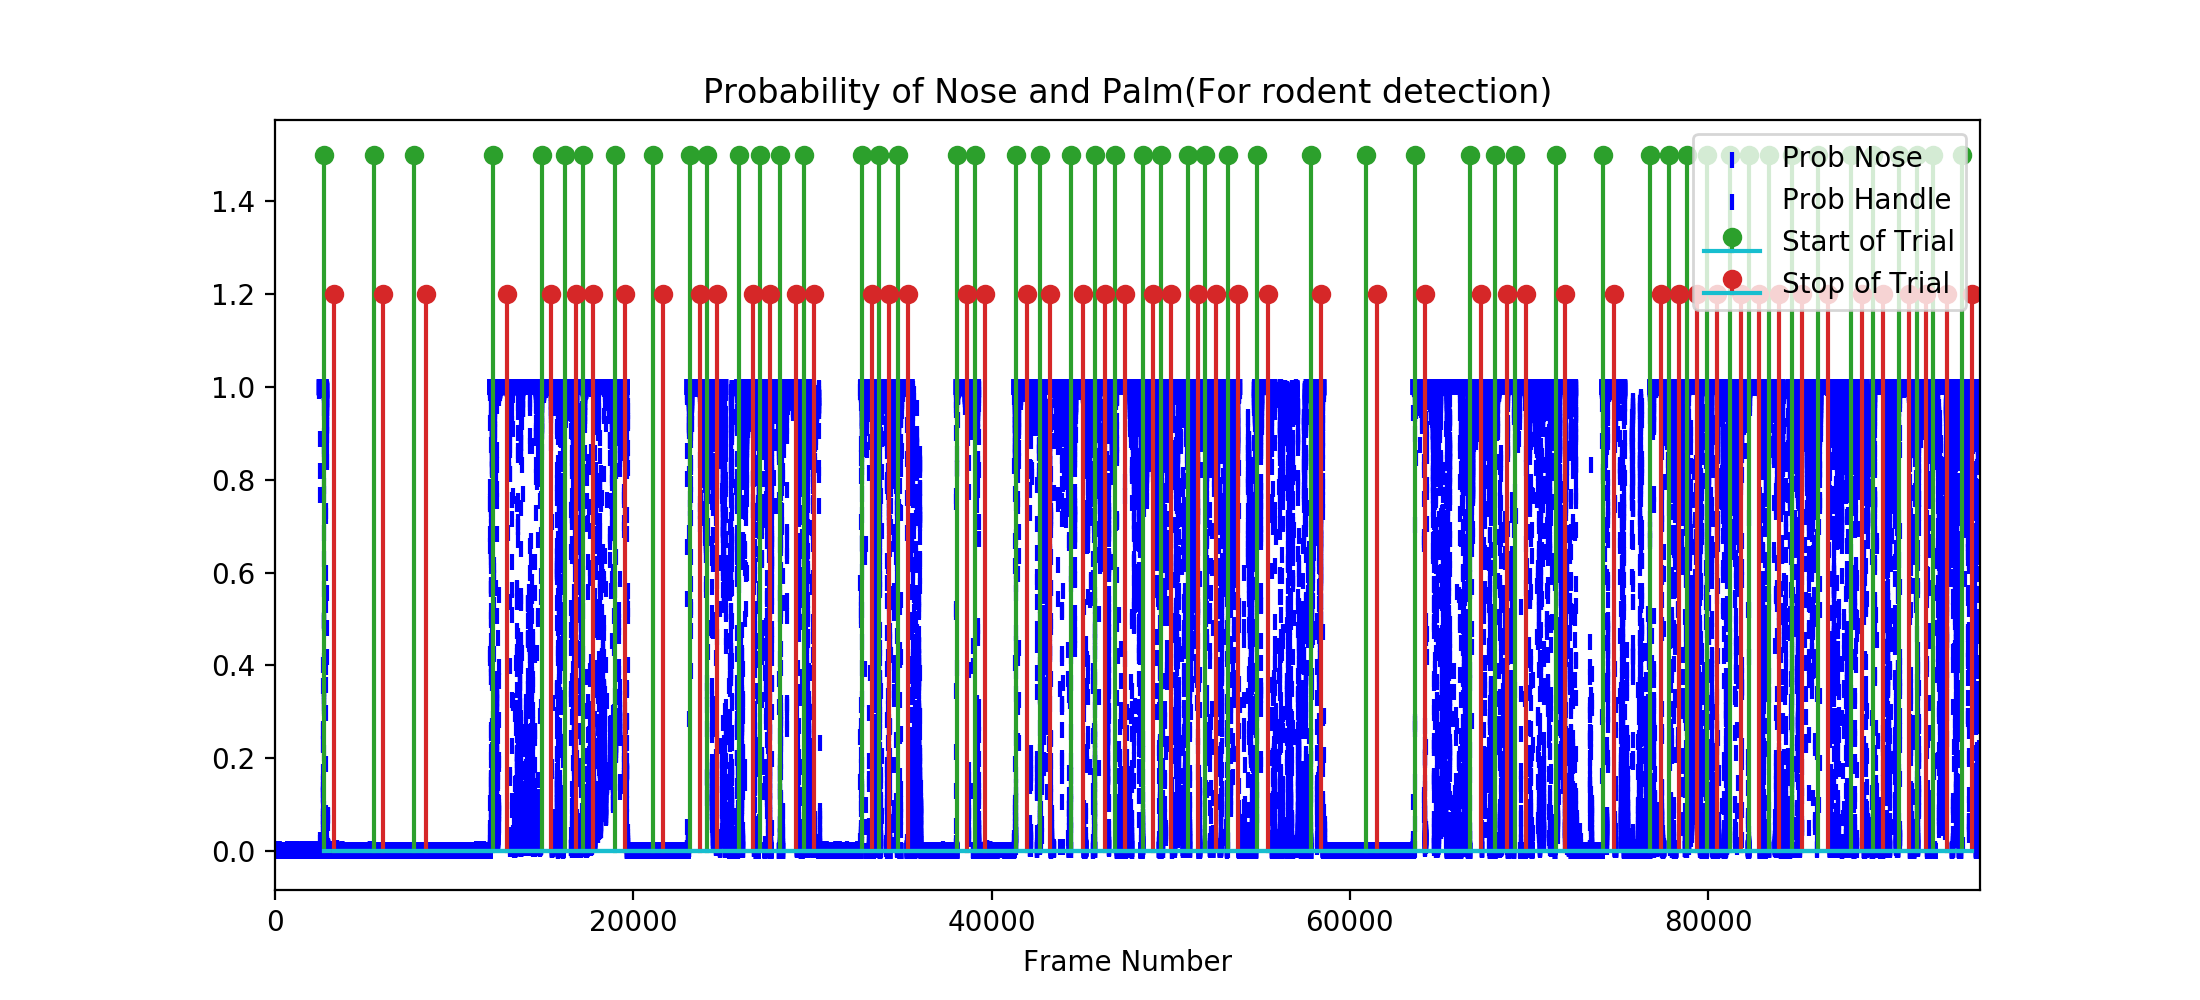

In [210]:
fig, ax = plt.subplots(figsize = (11,5))

plt.xlim(0, len(prob_handle))
y1 = [1.5] * start_time_arr.size
y2 = [1.2] * start_time_arr.size
y1 = np.array(y1)
y2 = np.array(y2)

plt.title('Probability of Nose and Palm(For rodent detection)')
plt.scatter(frame_axis, prob_nose, marker = '|', c = 'b', label = 'Prob Nose')
plt.scatter(frame_axis, prob_palm1, marker = '|', c = 'b', label = 'Prob Handle')

plt.stem(start_time_arr_f, y1, linefmt = 'C2-', markerfmt = 'C2o' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr_f, y2, linefmt = 'C3-', markerfmt = 'C3o' ,basefmt = 'C9-', label = 'Stop of Trial')
plt.xlabel('Frame Number')
plt.legend(loc = 1)
# for x_1 , x_2 in zip(df['Start Time'].values*25 ,df['End Time'].values*25):
#     ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#ADD8E6'))

In [211]:
trials_frames['Rodent Present'] = True

In [212]:
# Rodent Present or Not using Nose Prob
for i in range(len(trials_frames)):
    trials_frames['Rodent Present'][i] = (dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.8'][trials_frames['start'][i]:trials_frames['stop'][i]]>0.9).any()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [213]:
trials_frames

start   stop  start_s   stop_s  Rodent Present
0    2753   3317   110.12   132.68            True
1    5546   6038      221      241           False
2    7771   8414      310      336           False
3   12174  12957   486.96   518.28            True
4   14881  15401   595.24   616.04            True
5   16186  16787   647.44   671.48            True
6   17211  17765   688.44    710.6            True
7   18954  19536   758.16   781.44            True
8   21090  21683      843      867           False
9   23141  23697   925.64   947.88            True
10  24110  24682    964.4   987.28            True
11  25925  26661     1037  1066.44            True
12  27076  27632  1083.04  1105.28            True
13  28169  29109  1126.76  1164.36            True
14  29534  30098  1181.36  1203.92            True
15  32748  33299  1309.92  1331.96            True
16  33713  34266  1348.52  1370.64            True
17  34799  35352  1391.96  1414.08            True
18  38071  38639  1522.84  1545.56            True
19  39064  39627  1562.56  1585.08            True
20  41364  41957  1654.56  1678.28            True
21  42728  43279  1709.12  1731.16            True
22  44435  45081   1777.4  1803.24            True
23  45748  46305  1829.92   1852.2            True
24  46883  47446  1875.32  1897.84            True
25  48461  49018  1938.44  1960.72            True
26  49469  50028  1978.76  2001.12            True
27  50952  51513  2038.08  2060.52            True
28  51937  52499  2077.48  2099.96            True
29  53186  53745  2127.44   2149.8            True
30  54799  55440  2191.96   2217.6            True
31  57835  58398   2313.4  2335.92            True
32  60900  61503     2436     2460           False
33  63608  64184  2544.32  2567.36            True
34  66731  67299  2669.24  2691.96            True
35  68106  68793  2724.24  2751.72            True
36  69241  69818  2769.64  2792.72            True
37  71507  71988  2860.28  2879.52            True
38  74106  74736  2964.24  2989.44            True
39  76768  77391  3070.72  3095.64            True
40  77820  78393   3112.8  3135.72            True
41  78826  79398  3153.04  3175.92            True
42  79912  80488  3196.48  3219.52            True
43  81235  81809   3249.4  3272.36            True
44  82289  82852  3291.56  3314.08            True
45  83390  83963   3335.6  3358.52            True
46  84652  85220  3386.08   3408.8            True
47  86129  86689  3445.16  3467.56            True
48  87985  88565   3519.4   3542.6            True
49  89191  89767  3567.64  3590.68            True
50  90647  91203  3625.88  3648.12            True
51  91635  92137   3665.4  3685.48            True
52  92563  93317  3702.52  3732.68            True
53  94159  94733  3766.36  3789.32            True

## 2. Identification of Arm Reaches Trials

<IPython.core.display.Javascript object>


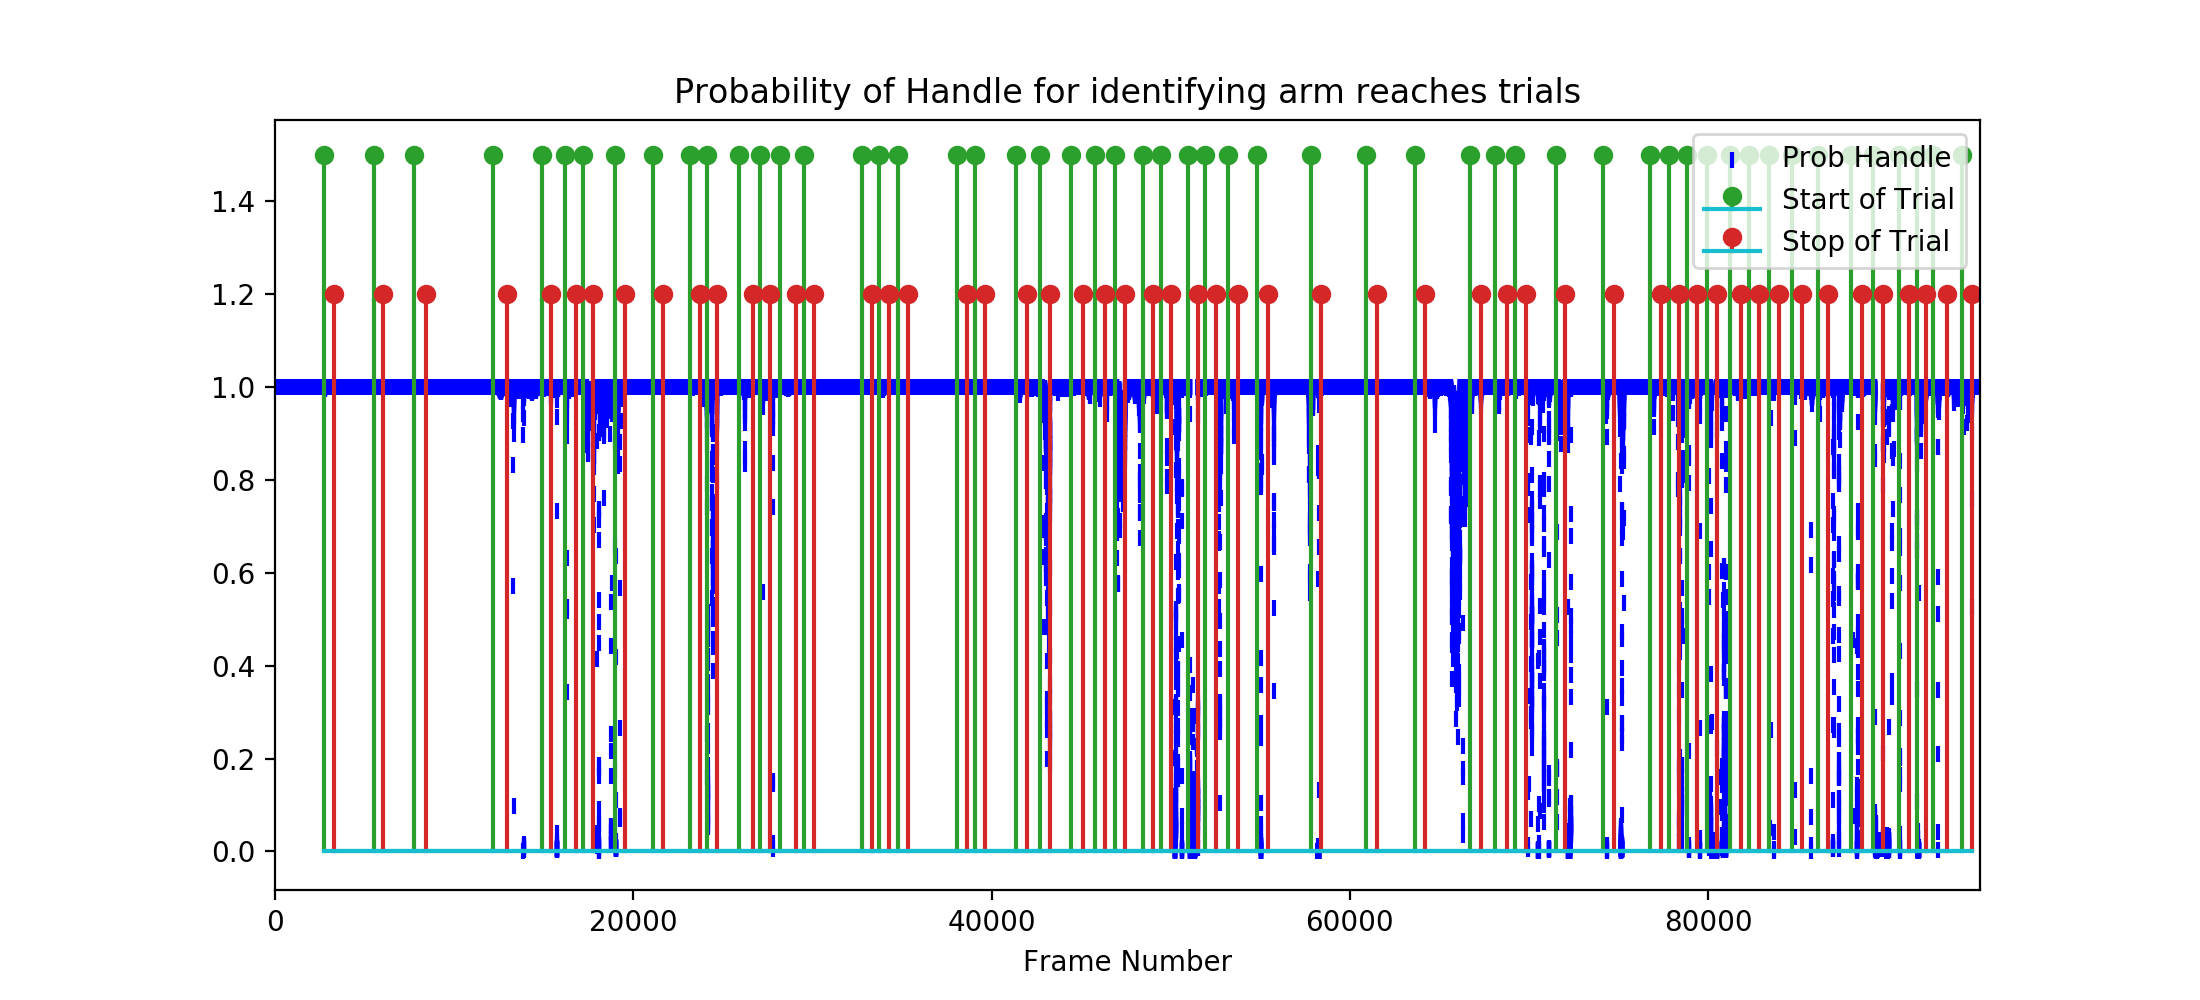

In [214]:
fig, ax = plt.subplots(figsize = (11,5))

plt.xlim(0, len(prob_handle))
y1 = [1.5] * start_time_arr.size
y2 = [1.2] * start_time_arr.size
y1 = np.array(y1)
y2 = np.array(y2)

plt.title('Probability of Handle for identifying arm reaches trials')
# plt.scatter(frame_axis, prob_nose, marker = '|', c = 'b', label = 'Prob Handle')
plt.scatter(frame_axis, prob_handle, marker = '|', c = 'b', label = 'Prob Handle')

plt.stem(start_time_arr_f, y1, linefmt = 'C2-', markerfmt = 'C2o' ,basefmt = 'C9-', label = 'Start of Trial') 
plt.stem(stop_time_arr_f, y2, linefmt = 'C3-', markerfmt = 'C3o' ,basefmt = 'C9-', label = 'Stop of Trial')
plt.xlabel('Frame Number')
plt.legend(loc = 1)
# for x_1 , x_2 in zip(df['Start Time'].values*25 ,df['End Time'].values*25):
#     ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,1, color = '#ADD8E6'))

In [215]:
trials_frames['Rodent Arm Reach'] = True

In [216]:
# Rodent Arm Reach or Not using Handle Prob

for i in range(len(trials_frames)):
    trials_frames['Rodent Arm Reach'][i] = (dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][trials_frames['start'][i]:trials_frames['stop'][i]]<0.9995).any()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [217]:
trials_frames

start   stop  start_s   stop_s  Rodent Present  Rodent Arm Reach
0    2753   3317   110.12   132.68            True              True
1    5546   6038      221      241           False             False
2    7771   8414      310      336           False             False
3   12174  12957   486.96   518.28            True              True
4   14881  15401   595.24   616.04            True              True
5   16186  16787   647.44   671.48            True              True
6   17211  17765   688.44    710.6            True              True
7   18954  19536   758.16   781.44            True              True
8   21090  21683      843      867           False             False
9   23141  23697   925.64   947.88            True              True
10  24110  24682    964.4   987.28            True              True
11  25925  26661     1037  1066.44            True              True
12  27076  27632  1083.04  1105.28            True              True
13  28169  29109  1126.76  1164.36            True              True
14  29534  30098  1181.36  1203.92            True             False
15  32748  33299  1309.92  1331.96            True             False
16  33713  34266  1348.52  1370.64            True              True
17  34799  35352  1391.96  1414.08            True             False
18  38071  38639  1522.84  1545.56            True             False
19  39064  39627  1562.56  1585.08            True             False
20  41364  41957  1654.56  1678.28            True              True
21  42728  43279  1709.12  1731.16            True              True
22  44435  45081   1777.4  1803.24            True              True
23  45748  46305  1829.92   1852.2            True              True
24  46883  47446  1875.32  1897.84            True              True
25  48461  49018  1938.44  1960.72            True              True
26  49469  50028  1978.76  2001.12            True              True
27  50952  51513  2038.08  2060.52            True              True
28  51937  52499  2077.48  2099.96            True              True
29  53186  53745  2127.44   2149.8            True              True
30  54799  55440  2191.96   2217.6            True              True
31  57835  58398   2313.4  2335.92            True              True
32  60900  61503     2436     2460           False             False
33  63608  64184  2544.32  2567.36            True             False
34  66731  67299  2669.24  2691.96            True              True
35  68106  68793  2724.24  2751.72            True              True
36  69241  69818  2769.64  2792.72            True              True
37  71507  71988  2860.28  2879.52            True              True
38  74106  74736  2964.24  2989.44            True              True
39  76768  77391  3070.72  3095.64            True              True
40  77820  78393   3112.8  3135.72            True              True
41  78826  79398  3153.04  3175.92            True              True
42  79912  80488  3196.48  3219.52            True              True
43  81235  81809   3249.4  3272.36            True              True
44  82289  82852  3291.56  3314.08            True              True
45  83390  83963   3335.6  3358.52            True              True
46  84652  85220  3386.08   3408.8            True              True
47  86129  86689  3445.16  3467.56            True              True
48  87985  88565   3519.4   3542.6            True              True
49  89191  89767  3567.64  3590.68            True              True
50  90647  91203  3625.88  3648.12            True              True
51  91635  92137   3665.4  3685.48            True              True
52  92563  93317  3702.52  3732.68            True              True
53  94159  94733  3766.36  3789.32            True              True

## Trials in which no arm reaches

<IPython.core.display.Javascript object>


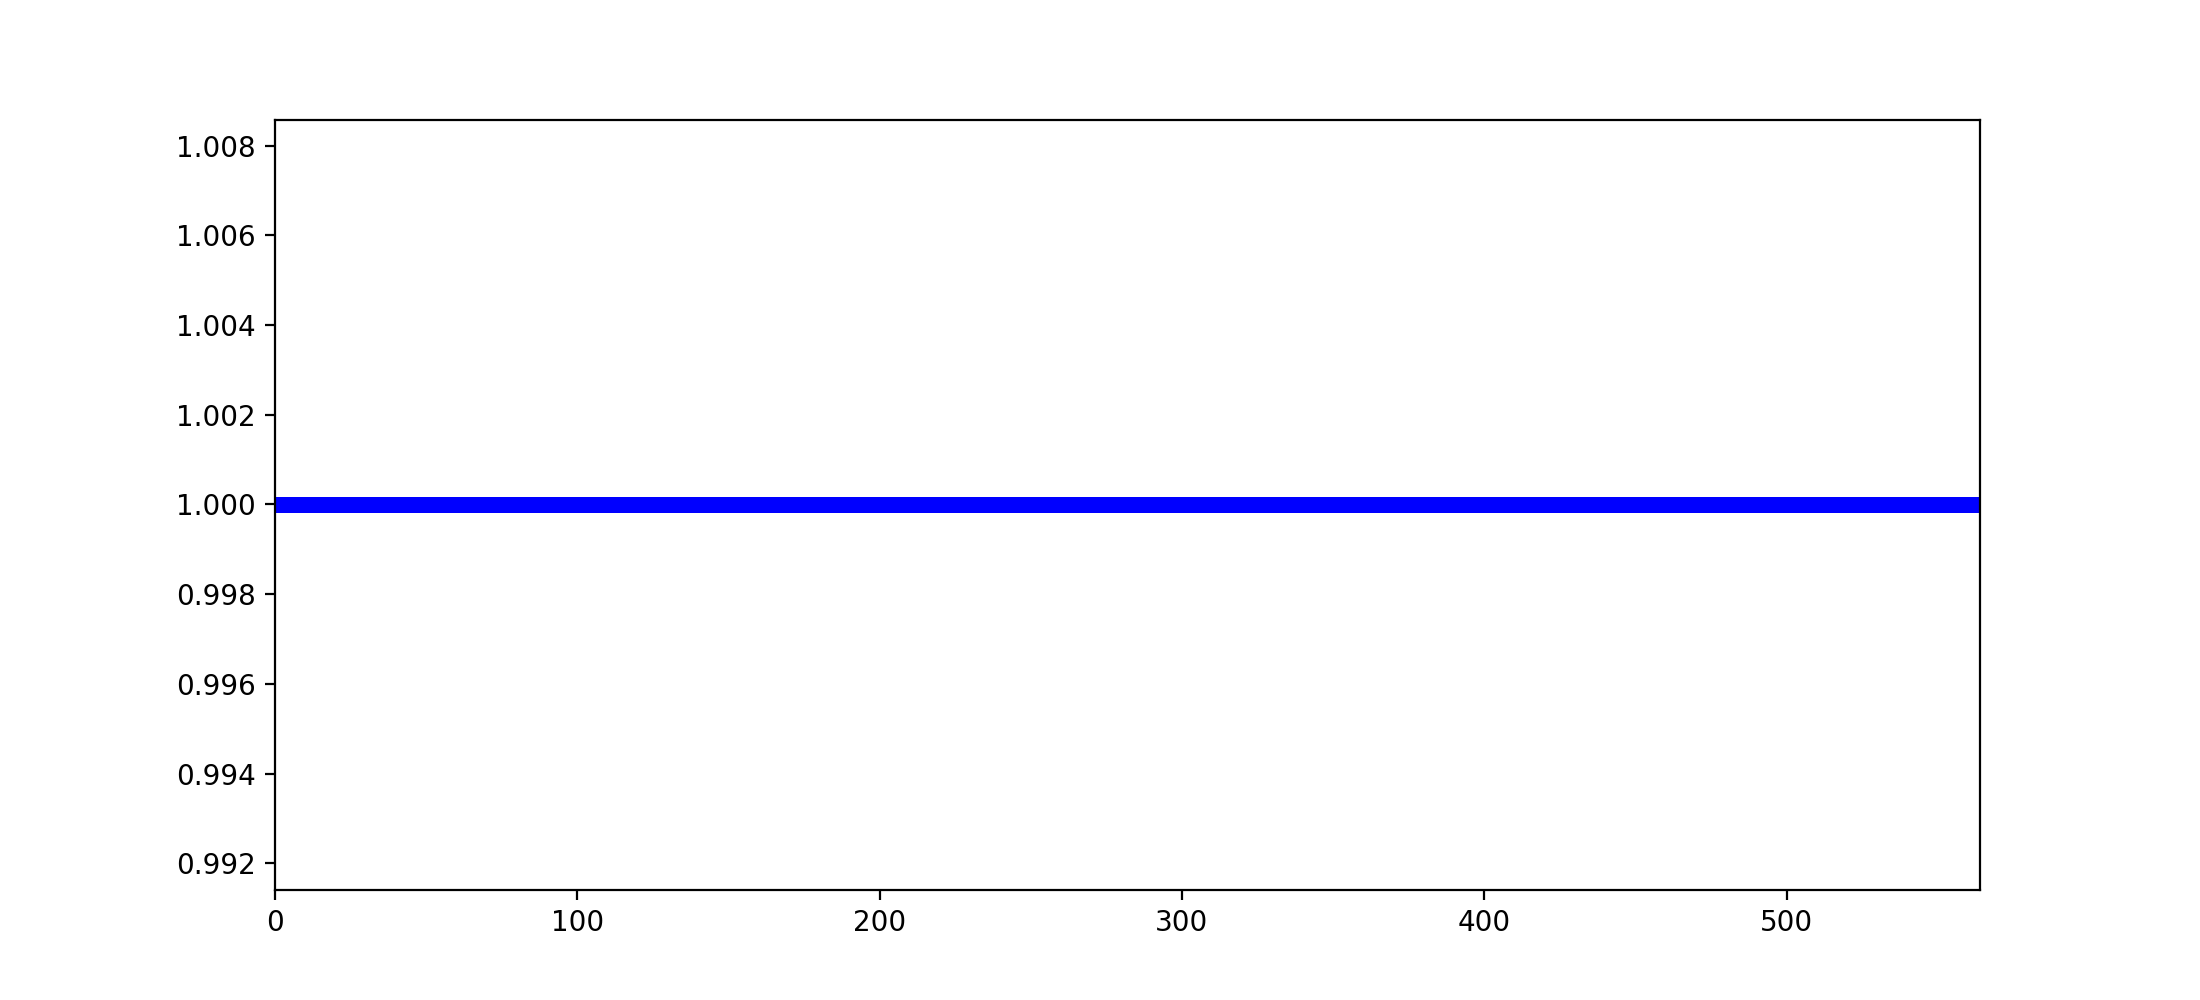

In [218]:
x_trial14 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][29534:30098]
fig, ax = plt.subplots(figsize = (11,5))
plt.xlim(0, len(x_trial14))
frame_axis = range(0,len(x_trial14),1)
plt.scatter(frame_axis, x_trial14, marker = '|', c = 'b', label = 'Raw')

<IPython.core.display.Javascript object>


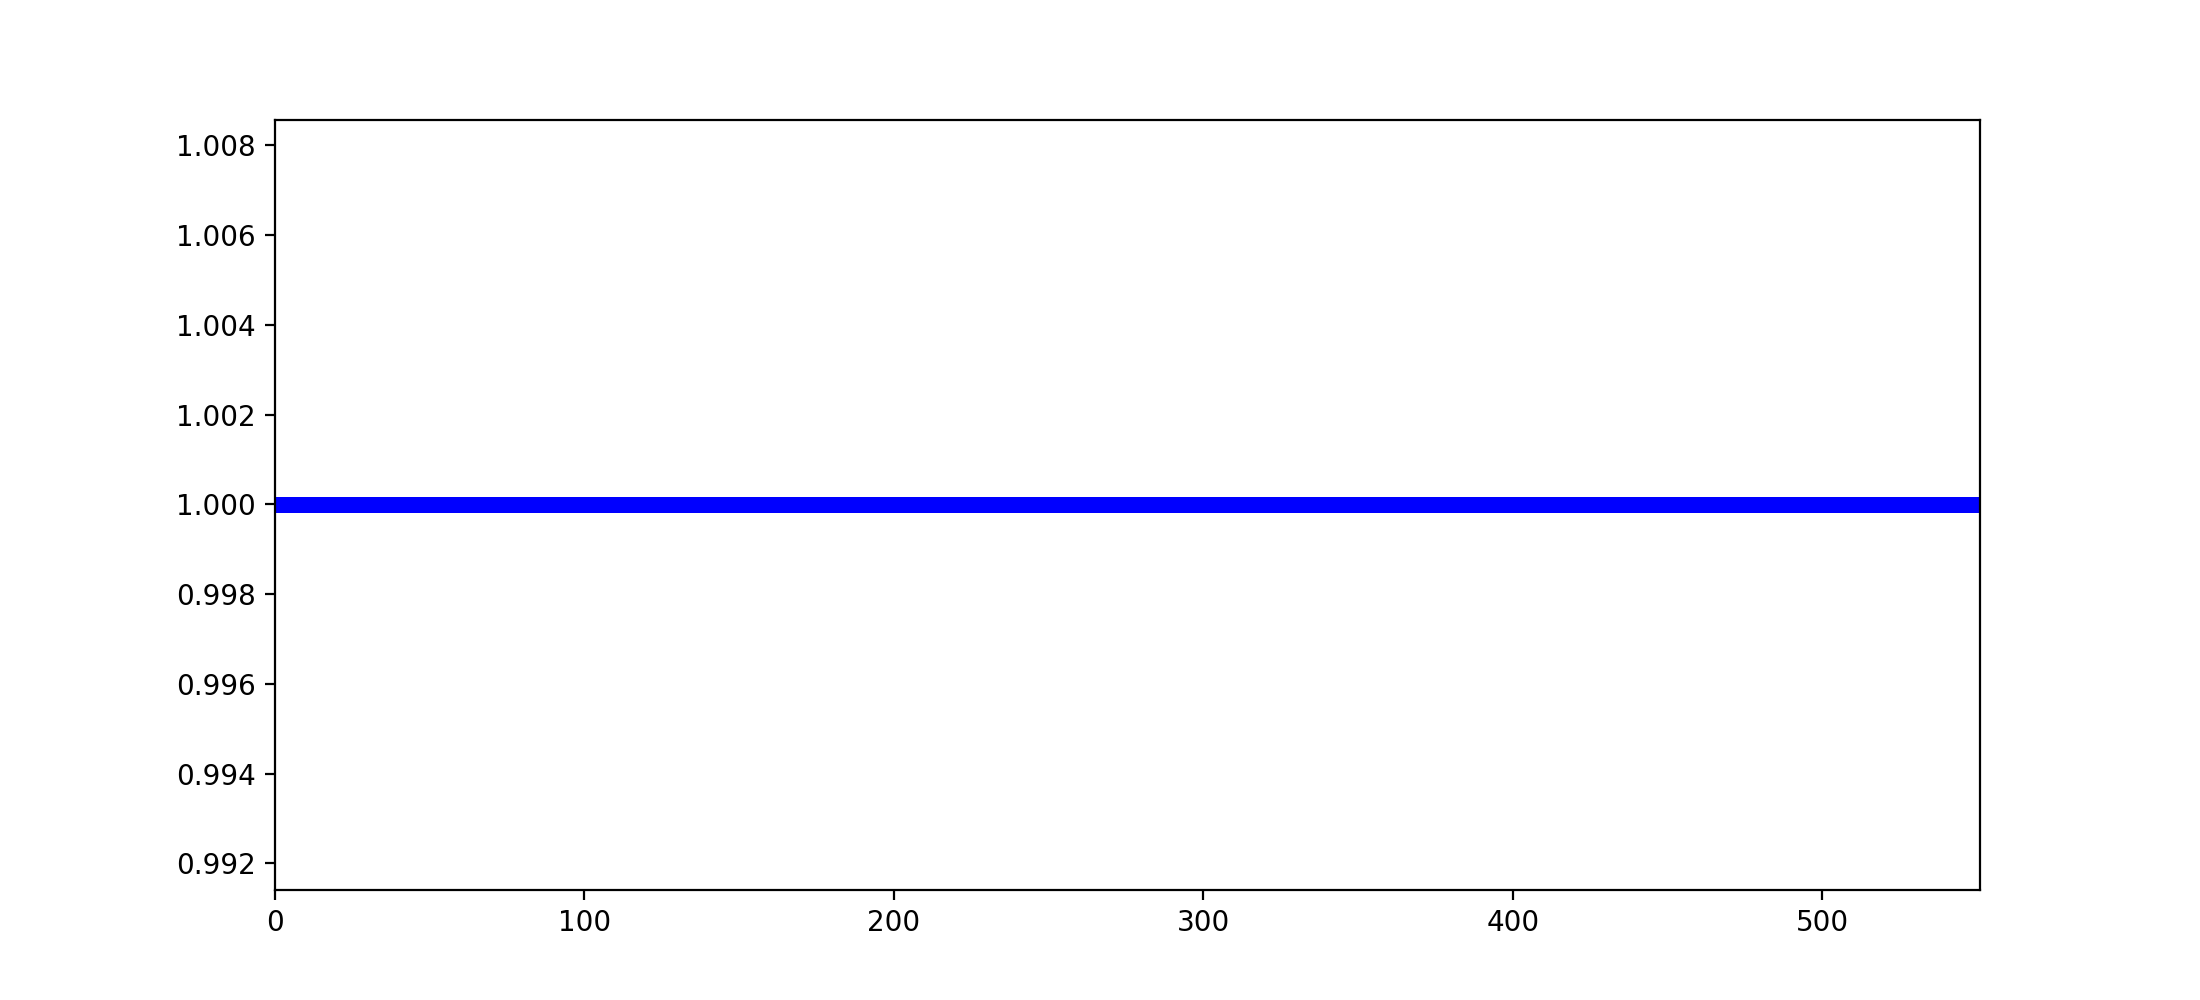

In [219]:
x_trial15 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][32748:33299]
fig, ax = plt.subplots(figsize = (11,5))
plt.xlim(0, len(x_trial15))
frame_axis = range(0,len(x_trial15),1)
plt.scatter(frame_axis, x_trial15, marker = '|', c = 'b', label = 'Raw')

<IPython.core.display.Javascript object>


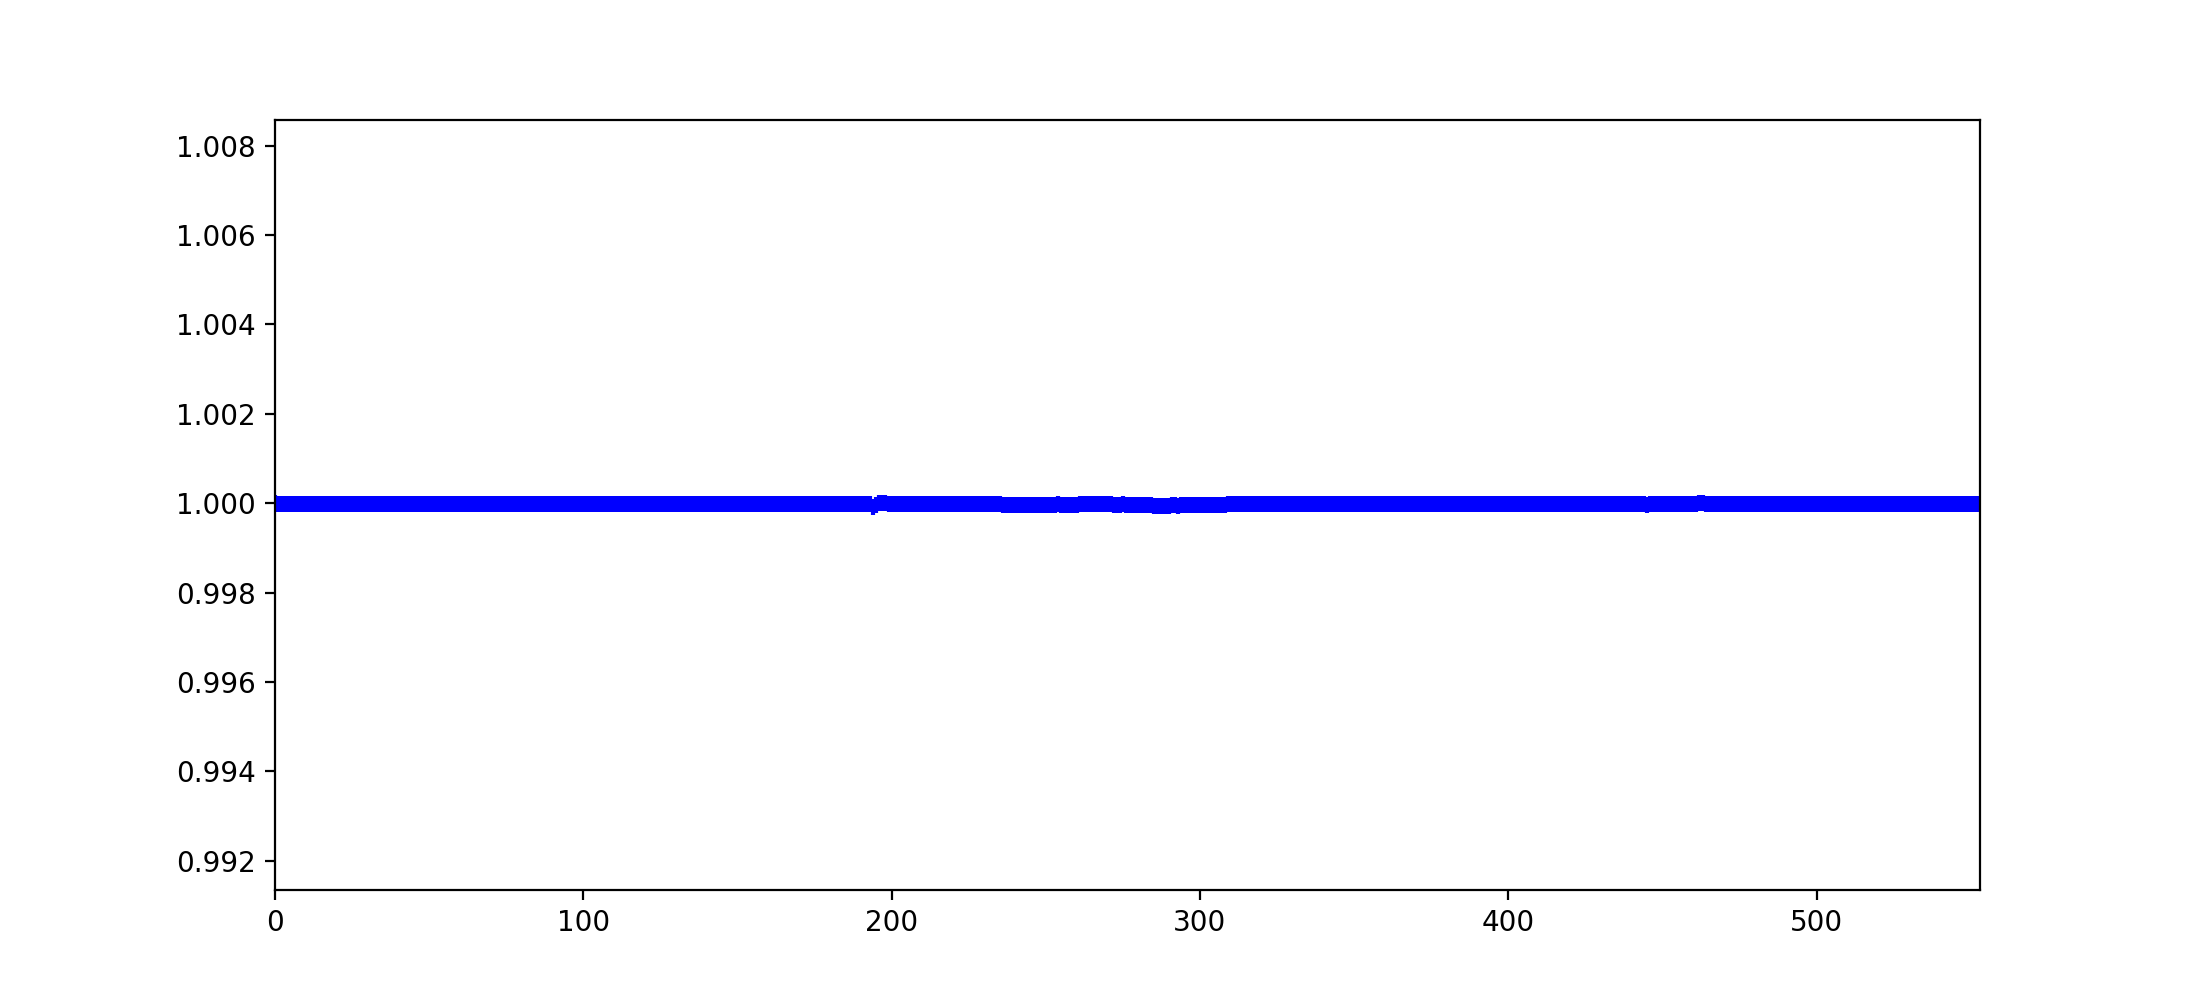

In [220]:
x_trial17 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][34799:35352]
fig, ax = plt.subplots(figsize = (11,5))
plt.xlim(0, len(x_trial17))
frame_axis = range(0,len(x_trial17),1)
plt.scatter(frame_axis, x_trial17, marker = '|', c = 'b', label = 'Raw')

<IPython.core.display.Javascript object>


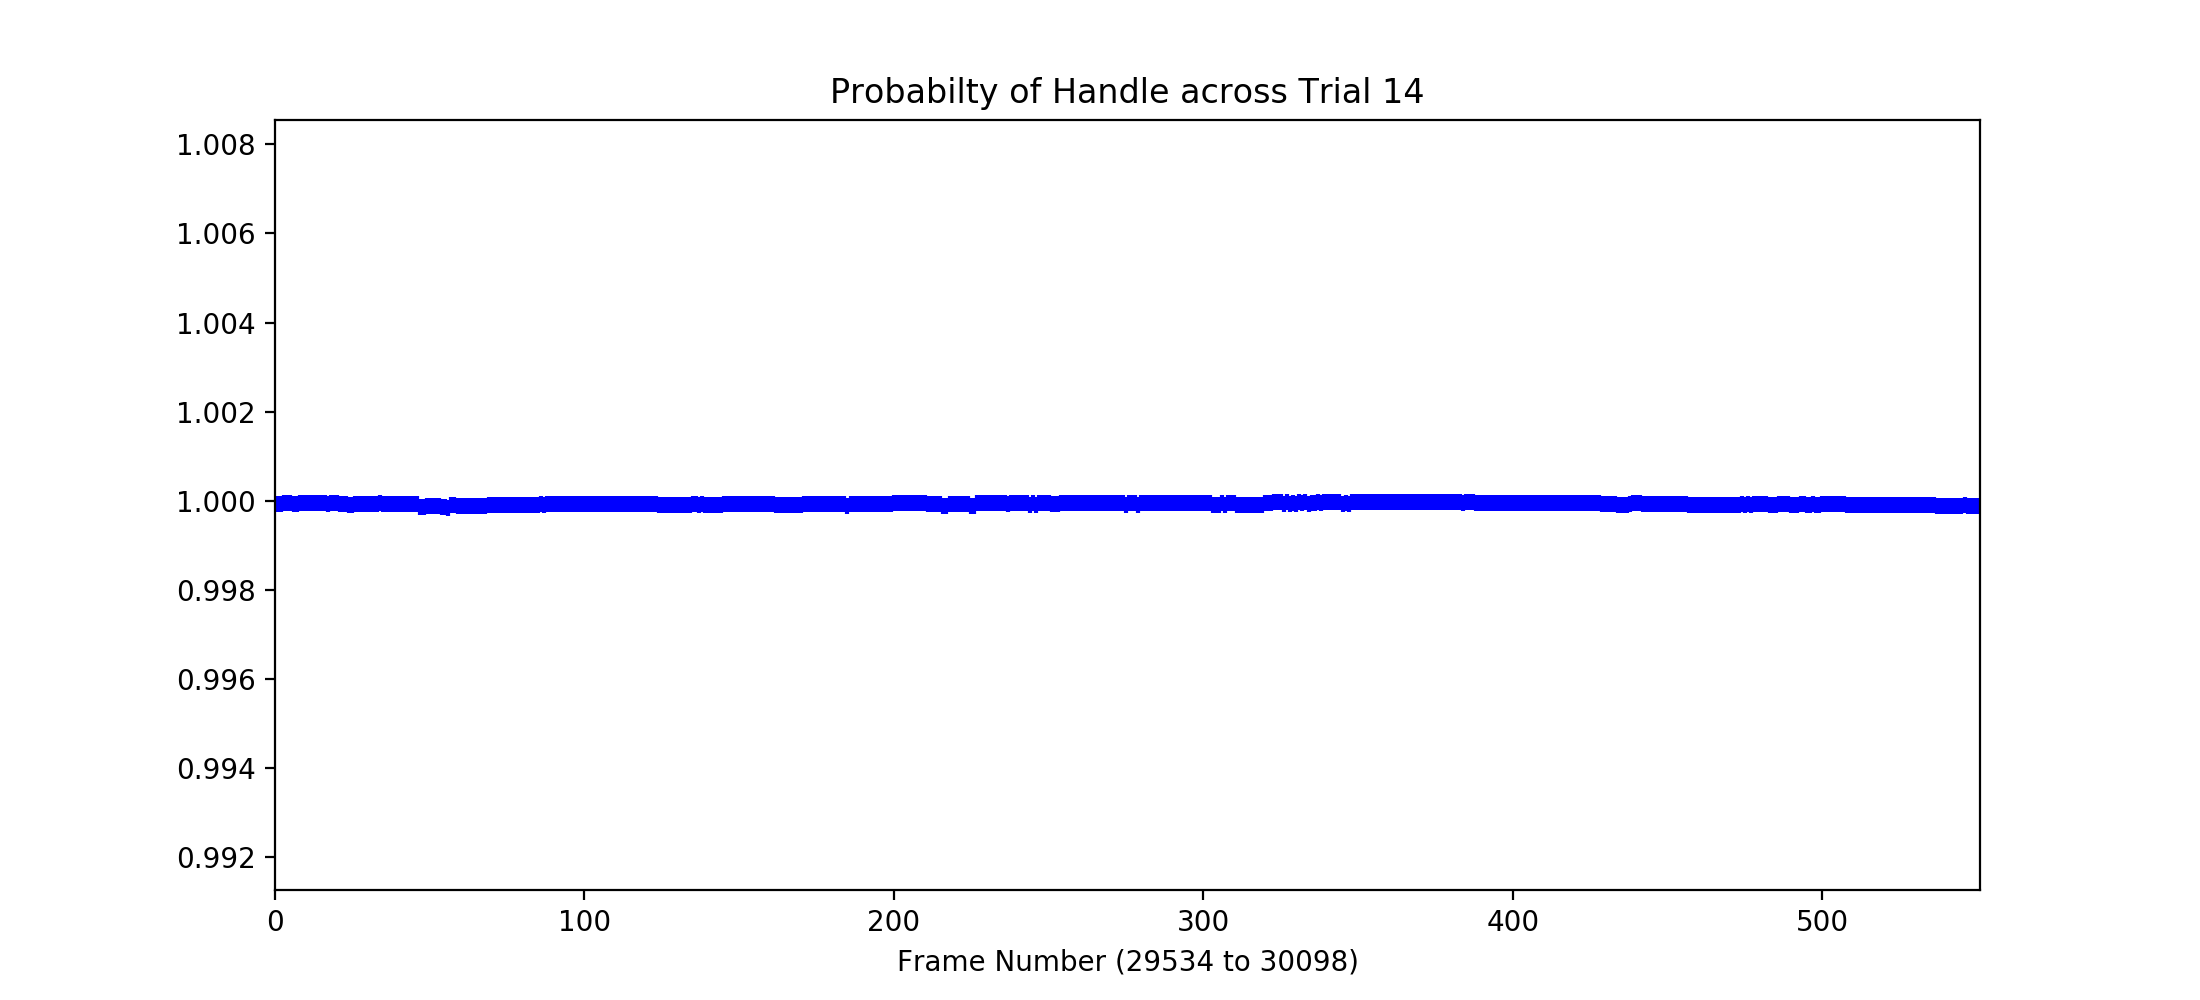

Text(0.5, 0, 'Frame Number (29534 to 30098)')

In [271]:
x_trial18 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][38071:38639]
fig, ax = plt.subplots(figsize = (11,5))
plt.xlim(0, len(x_trial15))
plt.title('Probabilty of Handle across Trial 14')
frame_axis = range(0,len(x_trial18),1)
plt.scatter(frame_axis, x_trial18, marker = '|', c = 'b', label = 'Raw')
plt.xlabel('Frame Number (29534 to 30098)')

In [268]:
# x_trial15 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][32748:33299]
# fig, ax = plt.subplots(figsize = (11,5))
# plt.xlim(0, len(x_trial15))
# plt.title('Probabilty of Handle across Trial 15')
# frame_axis = range(0,len(x_trial15),1)
# plt.scatter(frame_axis, x_trial15, marker = '|', c = 'b', label = 'Raw')
# plt.xlabel('Frame Number (38071 to 38639)')

<IPython.core.display.Javascript object>


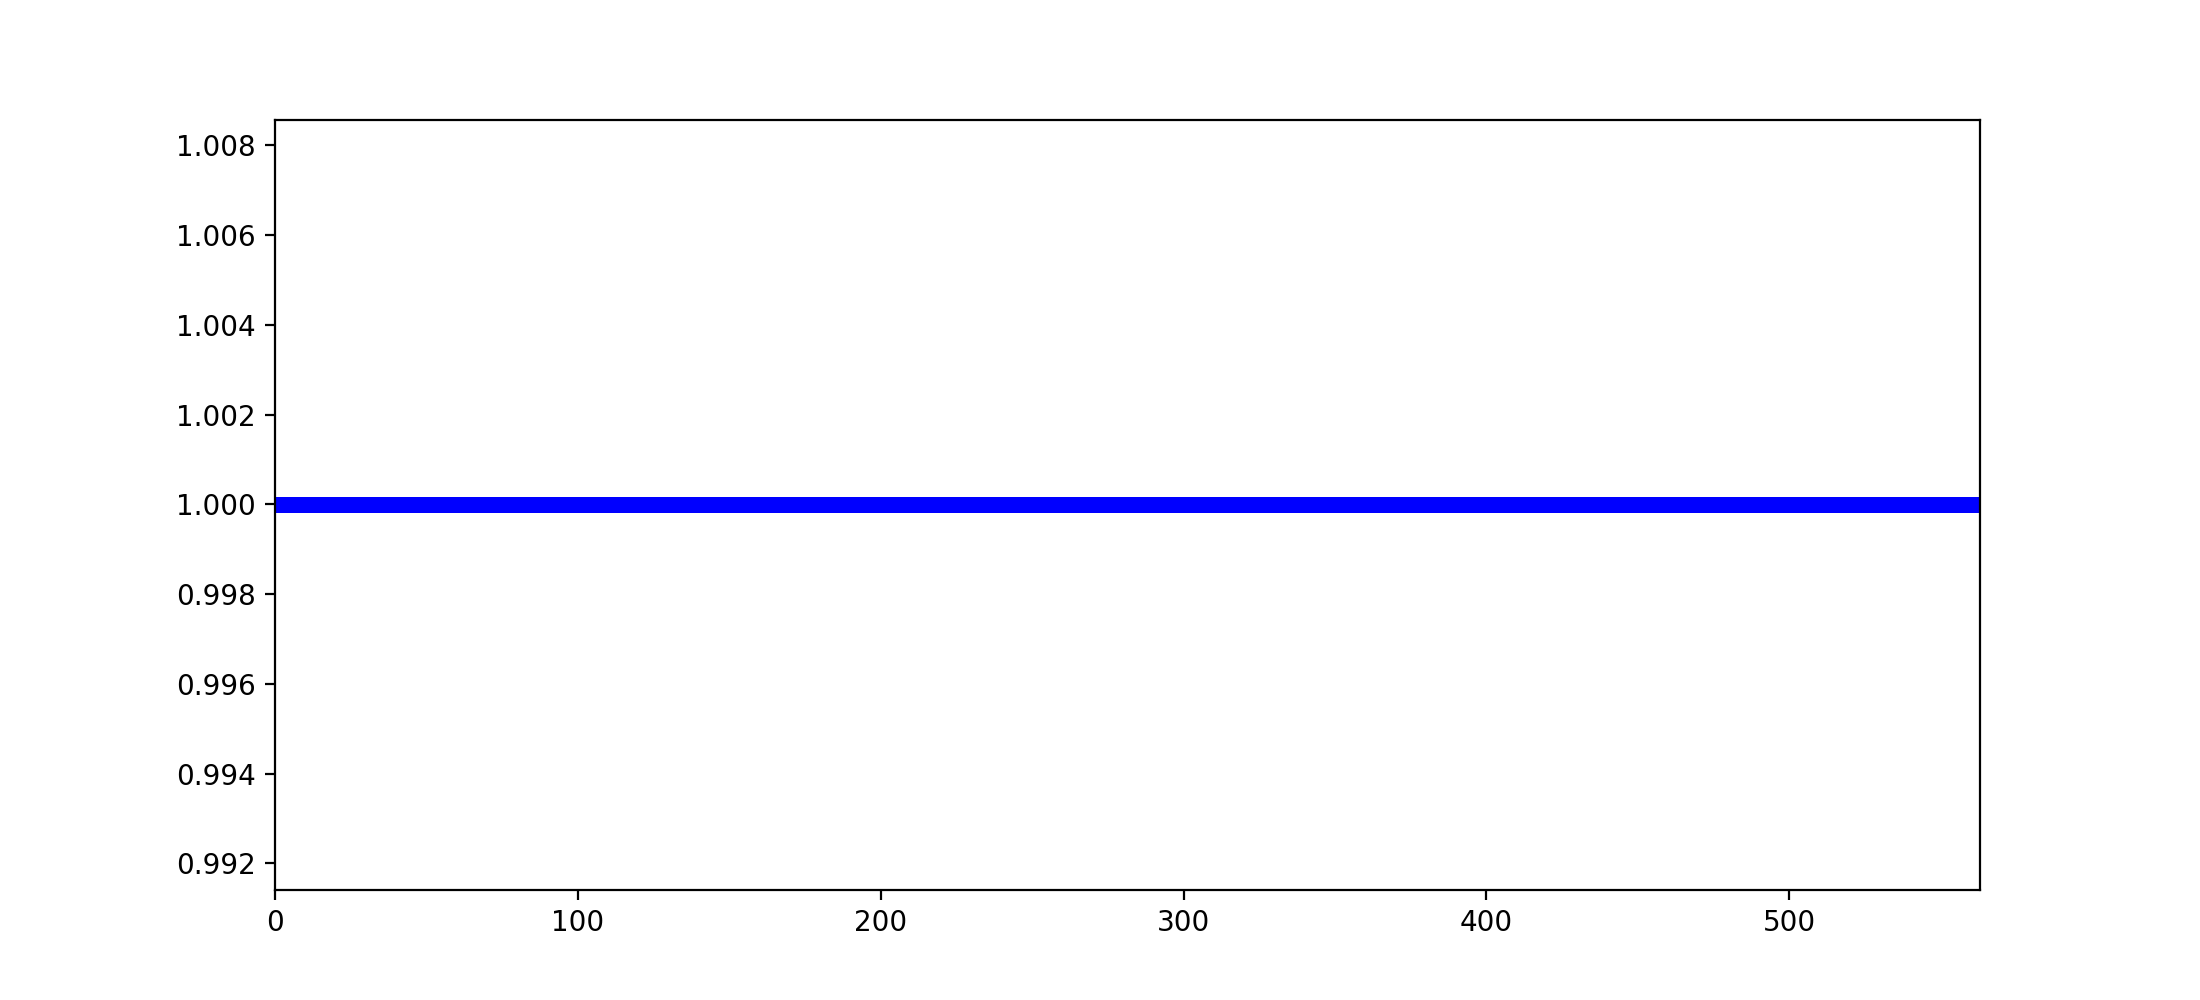

In [222]:
x_trial19 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2'][39064:39627]
fig, ax = plt.subplots(figsize = (11,5))
plt.xlim(0, len(x_trial19))
frame_axis = range(0,len(x_trial19),1)
plt.scatter(frame_axis, x_trial19, marker = '|', c = 'b', label = 'Raw')

## 3. Exploring Kinematic Dataset

In [223]:
dlc_csv1 = pd.read_csv('DLCcam2filtered_coorindates.csv')

In [224]:
compare_x = pd.DataFrame()

In [225]:
compare_x['handle'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012']
# compare_x['wrist1'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.15']
compare_x['palm1'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.18']
compare_x['palm2'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.54']
compare_x['prob'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.8']

In [226]:
compare_y = pd.DataFrame()

In [227]:
compare_y['handle'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.1']
compare_y['palm1'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.19']
# compare_y['wrist1'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.16']
compare_y['palm2'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.55']
compare_y['prob'] = dlc_csv1['DLC_resnet101_CatScanJul27shuffle5_600012.8']

<IPython.core.display.Javascript object>


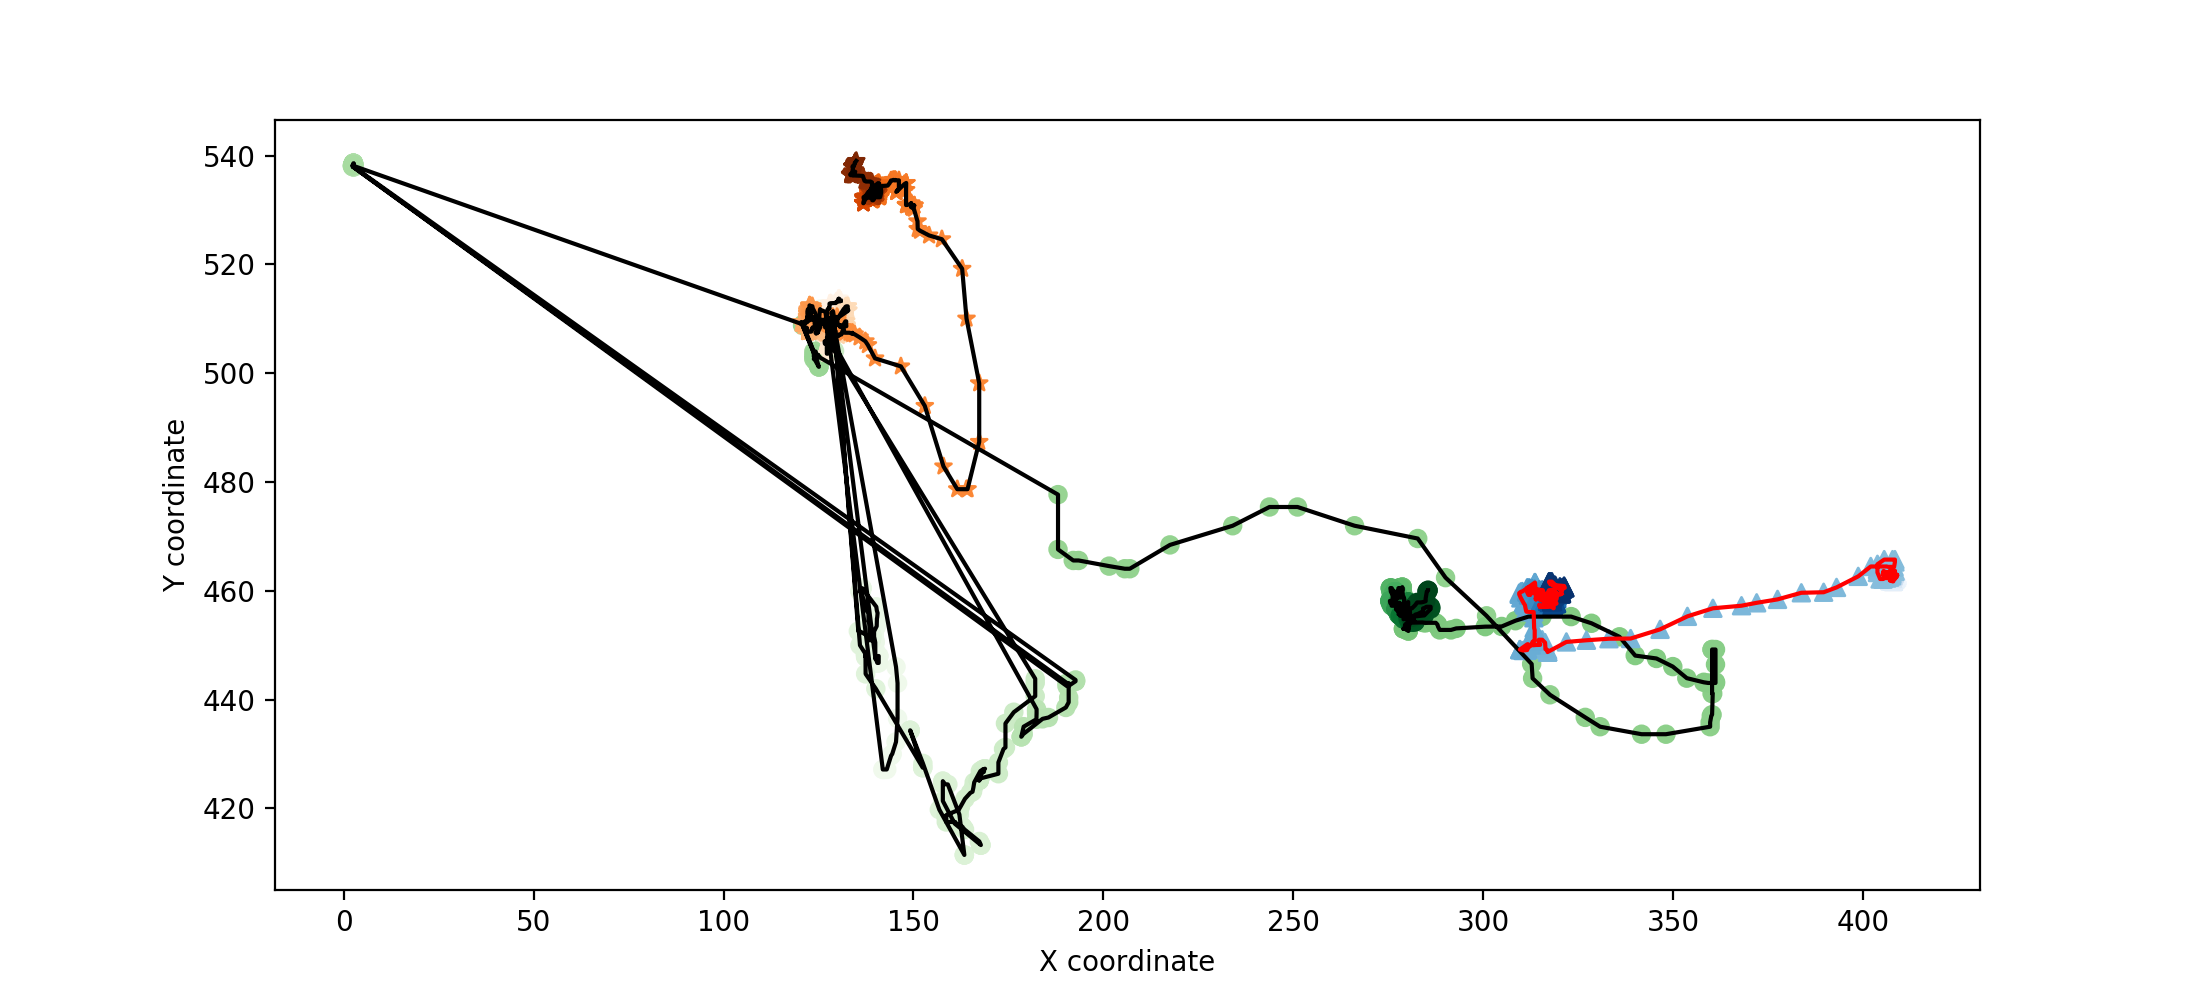

Text(0, 0.5, 'Y coordinate')

In [246]:
#Trial 3

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
cm3 = plt.cm.get_cmap('Oranges')
xx = compare_x['palm1'][12174:12957]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm1'][12174:12957],compare_y['palm1'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o')
# plt.scatter(compare_x['palm1'][12956:12957],compare_y['palm1'][12956:12957], c = 'g', marker = 'o', label = 'Palm 1')
plt.plot(compare_x['palm1'][12174:12957],compare_y['palm1'][12174:12957], color = 'black')

plt.scatter(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm3, marker = '*')
# plt.scatter(compare_x['palm2'][12956:12957],compare_y['palm2'][12956:12957], c = '#FFA500', marker = '*', label = 'Palm 2')
plt.plot(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], color = 'black')

plt.scatter(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = '^')
# plt.scatter(compare_x['handle'][12956:12957],compare_y['handle'][12956:12957], c = 'b', marker = '^', label = 'Handle')
plt.plot(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], color = 'red')
# plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

<IPython.core.display.Javascript object>


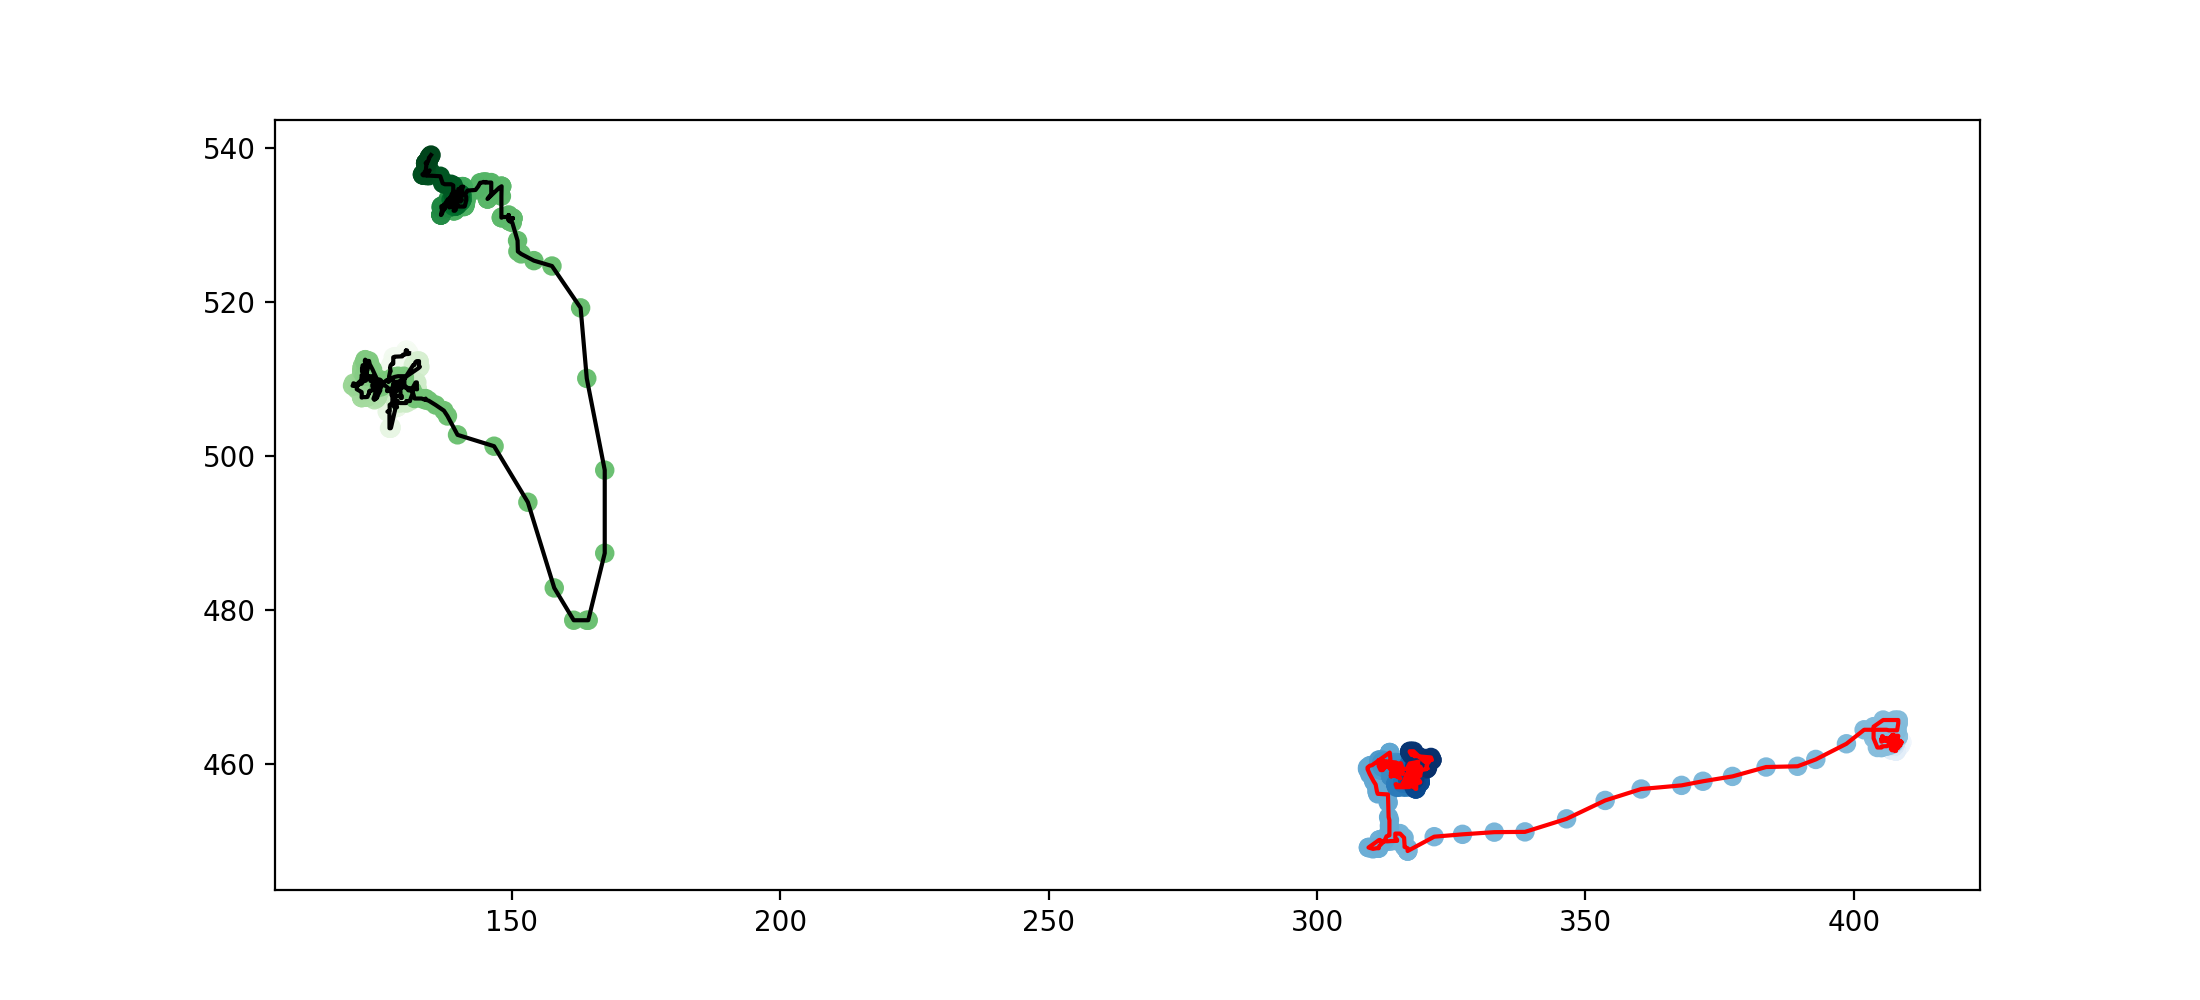

In [229]:
#Trial 3

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
xx = compare_x['palm1'][12174:12957]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o', label = 'Palm')
plt.plot(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], color = 'black')
plt.scatter(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = 'o', label = 'Handle')
plt.plot(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], color = 'red')

<IPython.core.display.Javascript object>


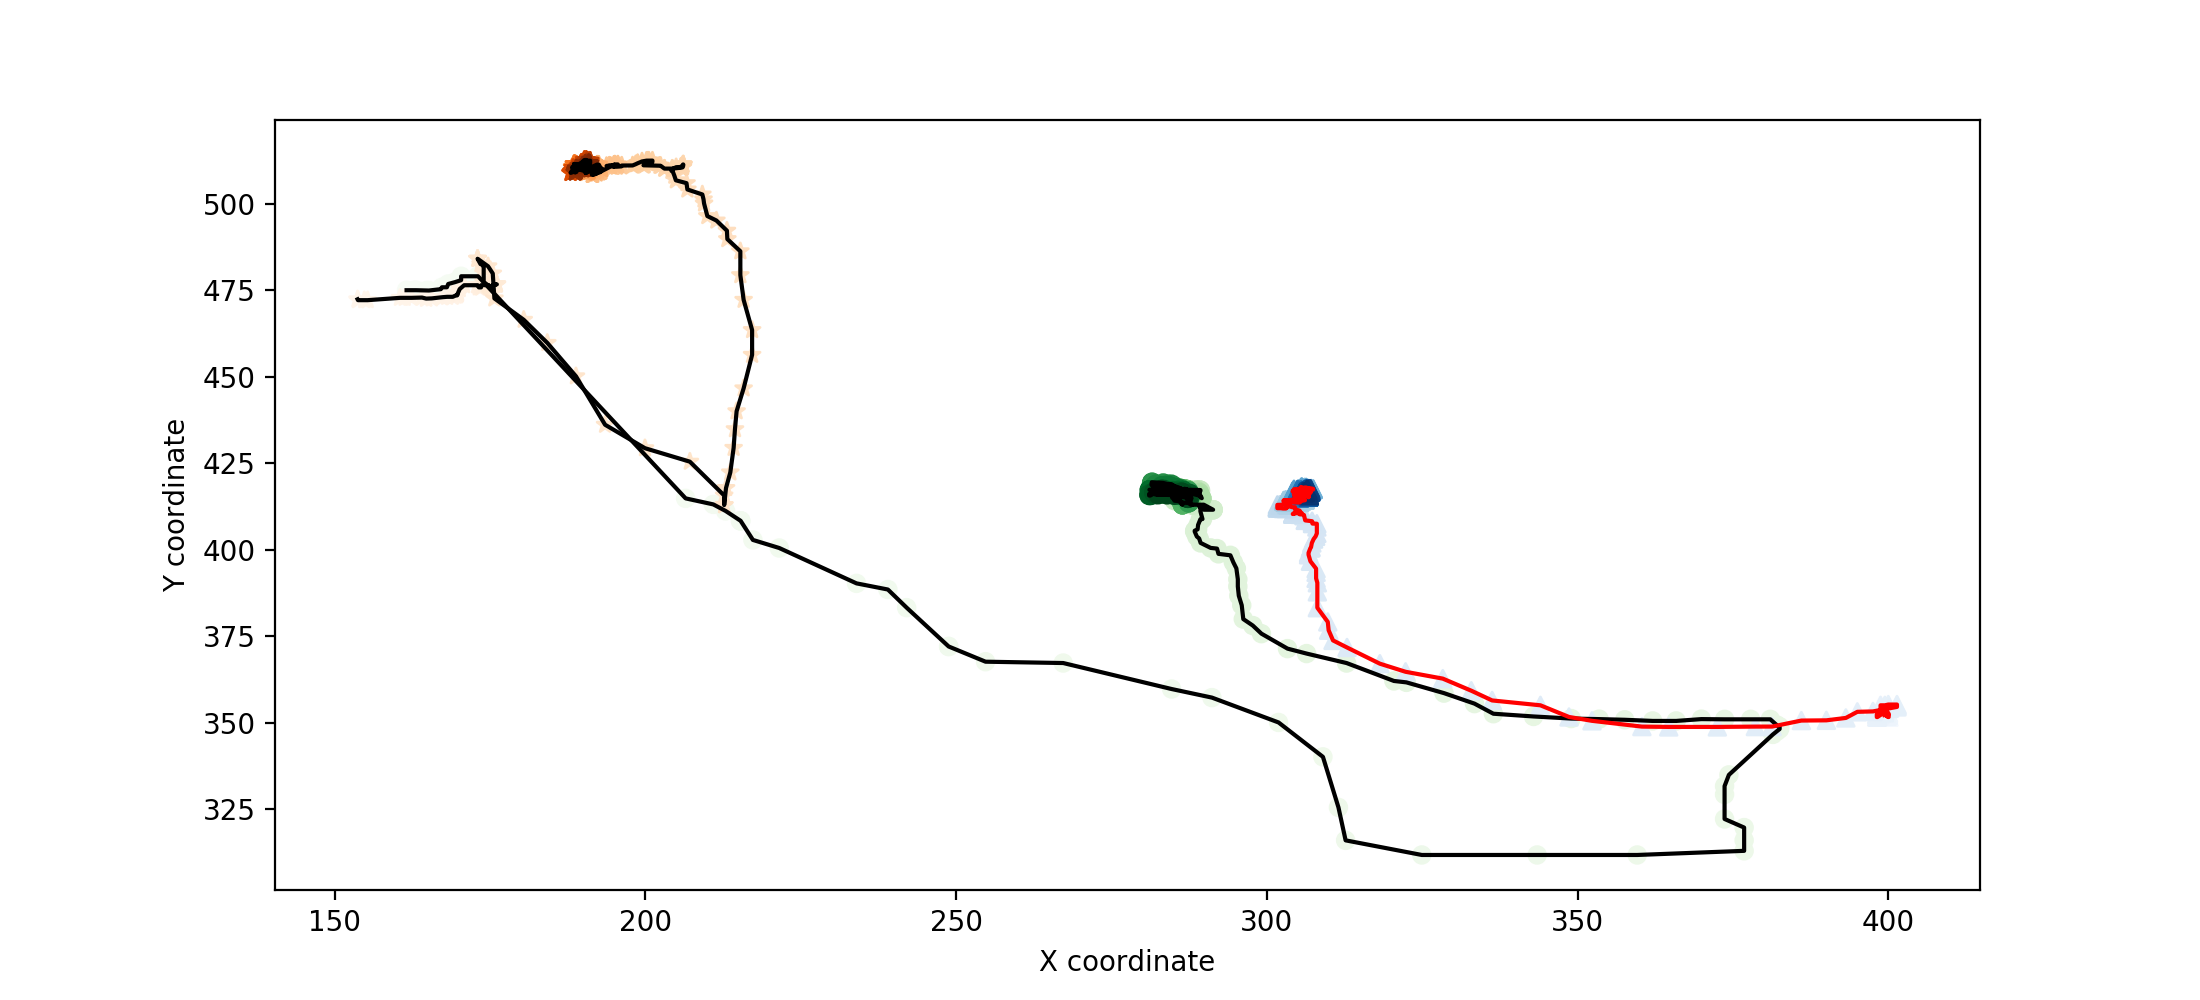

Text(0, 0.5, 'Y coordinate')

In [248]:
#Trial 4

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
cm3 = plt.cm.get_cmap('Oranges')
xx = compare_x['palm1'][14881:15401]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm1'][14881:15401],compare_y['palm1'][14881:15401], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o')
# plt.scatter(compare_x['palm1'][12956:12957],compare_y['palm1'][12956:12957], c = 'g', marker = 'o', label = 'Palm 1')
plt.plot(compare_x['palm1'][14881:15401],compare_y['palm1'][14881:15401], color = 'black')

plt.scatter(compare_x['palm2'][14881:15401],compare_y['palm2'][14881:15401], c = c,vmin=0, vmax=len(xx), cmap=cm3, marker = '*')
# plt.scatter(compare_x['palm2'][12956:12957],compare_y['palm2'][12956:12957], c = '#FFA500', marker = '*', label = 'Palm 2')
plt.plot(compare_x['palm2'][14881:15401],compare_y['palm2'][14881:15401], color = 'black')

plt.scatter(compare_x['handle'][14881:15401],compare_y['handle'][14881:15401], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = '^')
# plt.scatter(compare_x['handle'][12956:12957],compare_y['handle'][12956:12957], c = 'b', marker = '^', label = 'Handle')
plt.plot(compare_x['handle'][14881:15401],compare_y['handle'][14881:15401], color = 'red')
# plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

<IPython.core.display.Javascript object>


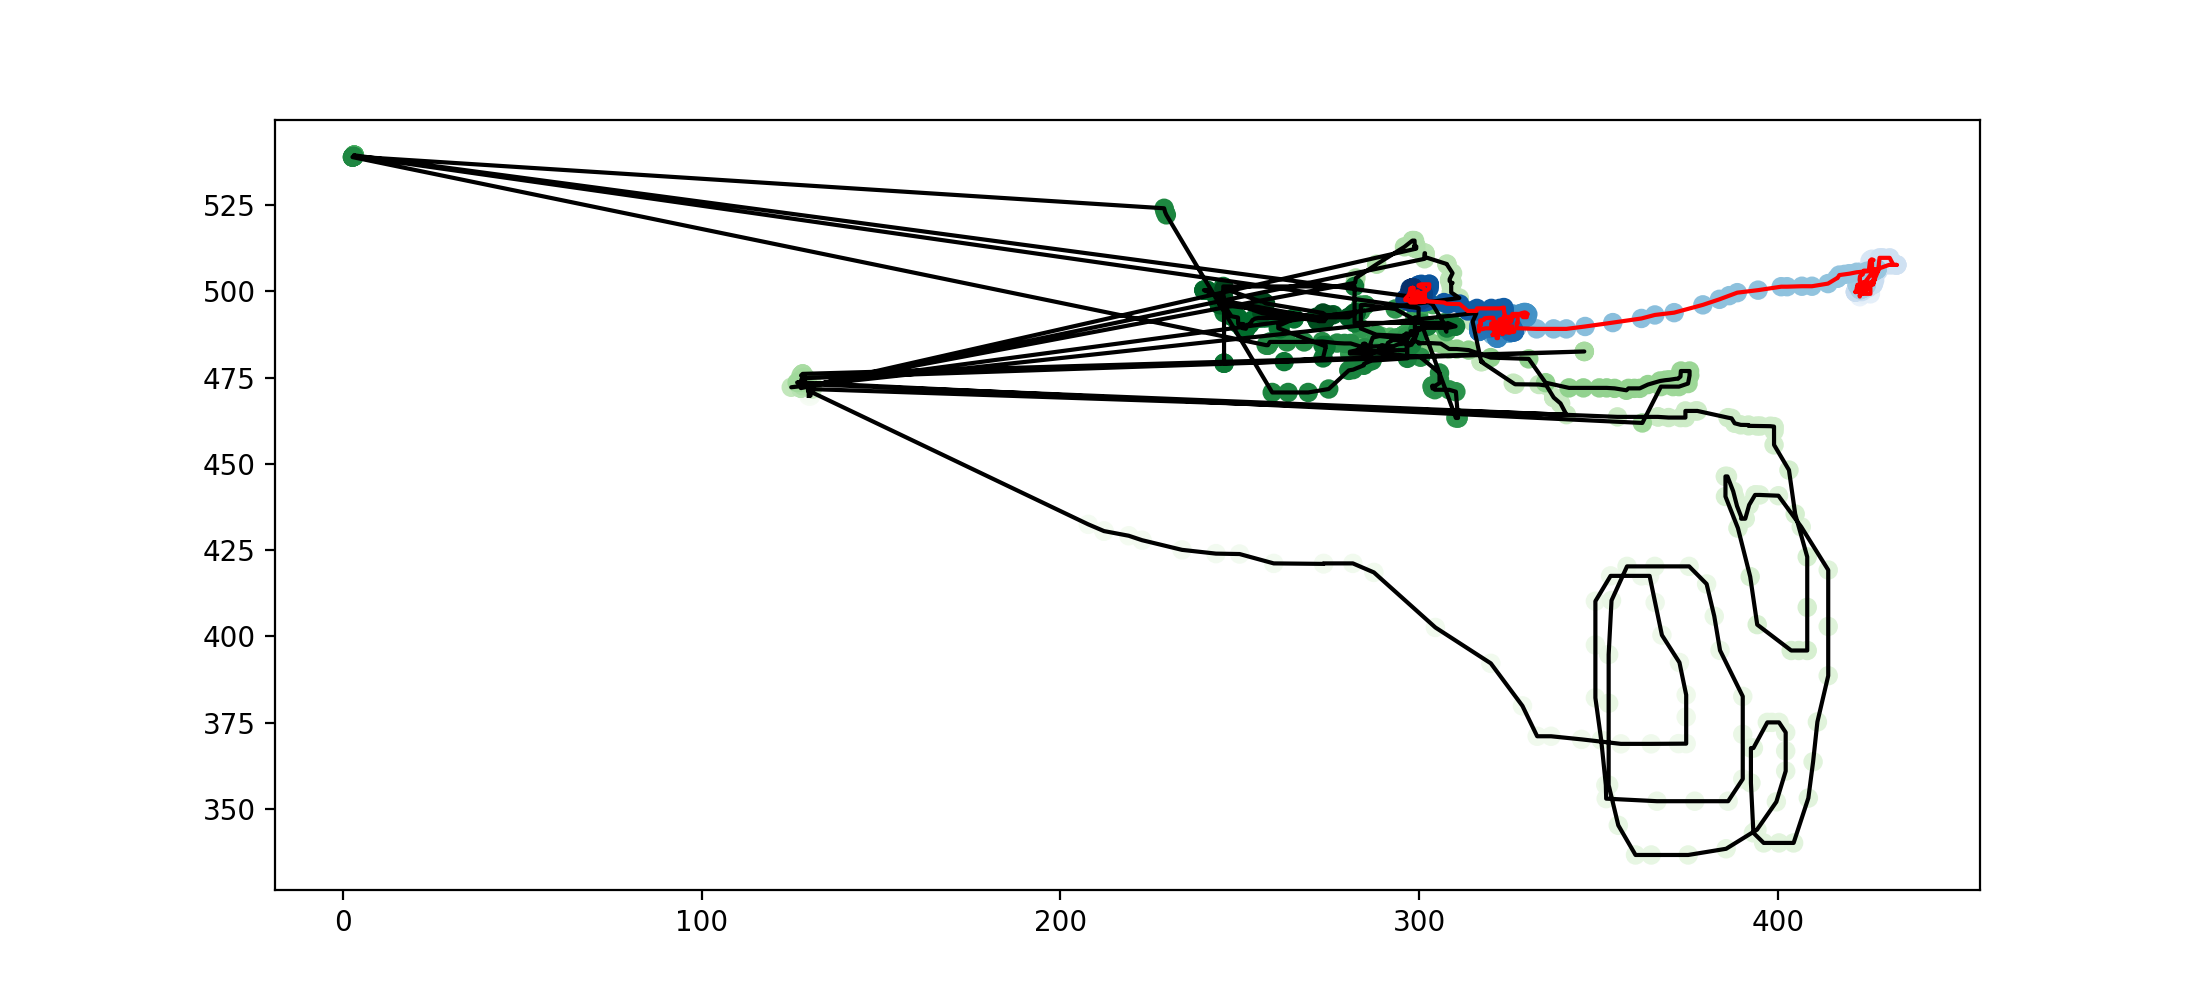

In [230]:
#Trial 5

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
xx = compare_x['palm1'][16186:16787]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm1'][16186:16787],compare_y['palm1'][16186:16787], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o', label = 'Palm')
plt.plot(compare_x['palm1'][16186:16787],compare_y['palm1'][16186:16787], color = 'black')

plt.scatter(compare_x['handle'][16186:16787],compare_y['handle'][16186:16787], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = 'o', label = 'Handle')
plt.plot(compare_x['handle'][16186:16787],compare_y['handle'][16186:16787], color = 'red')


<IPython.core.display.Javascript object>


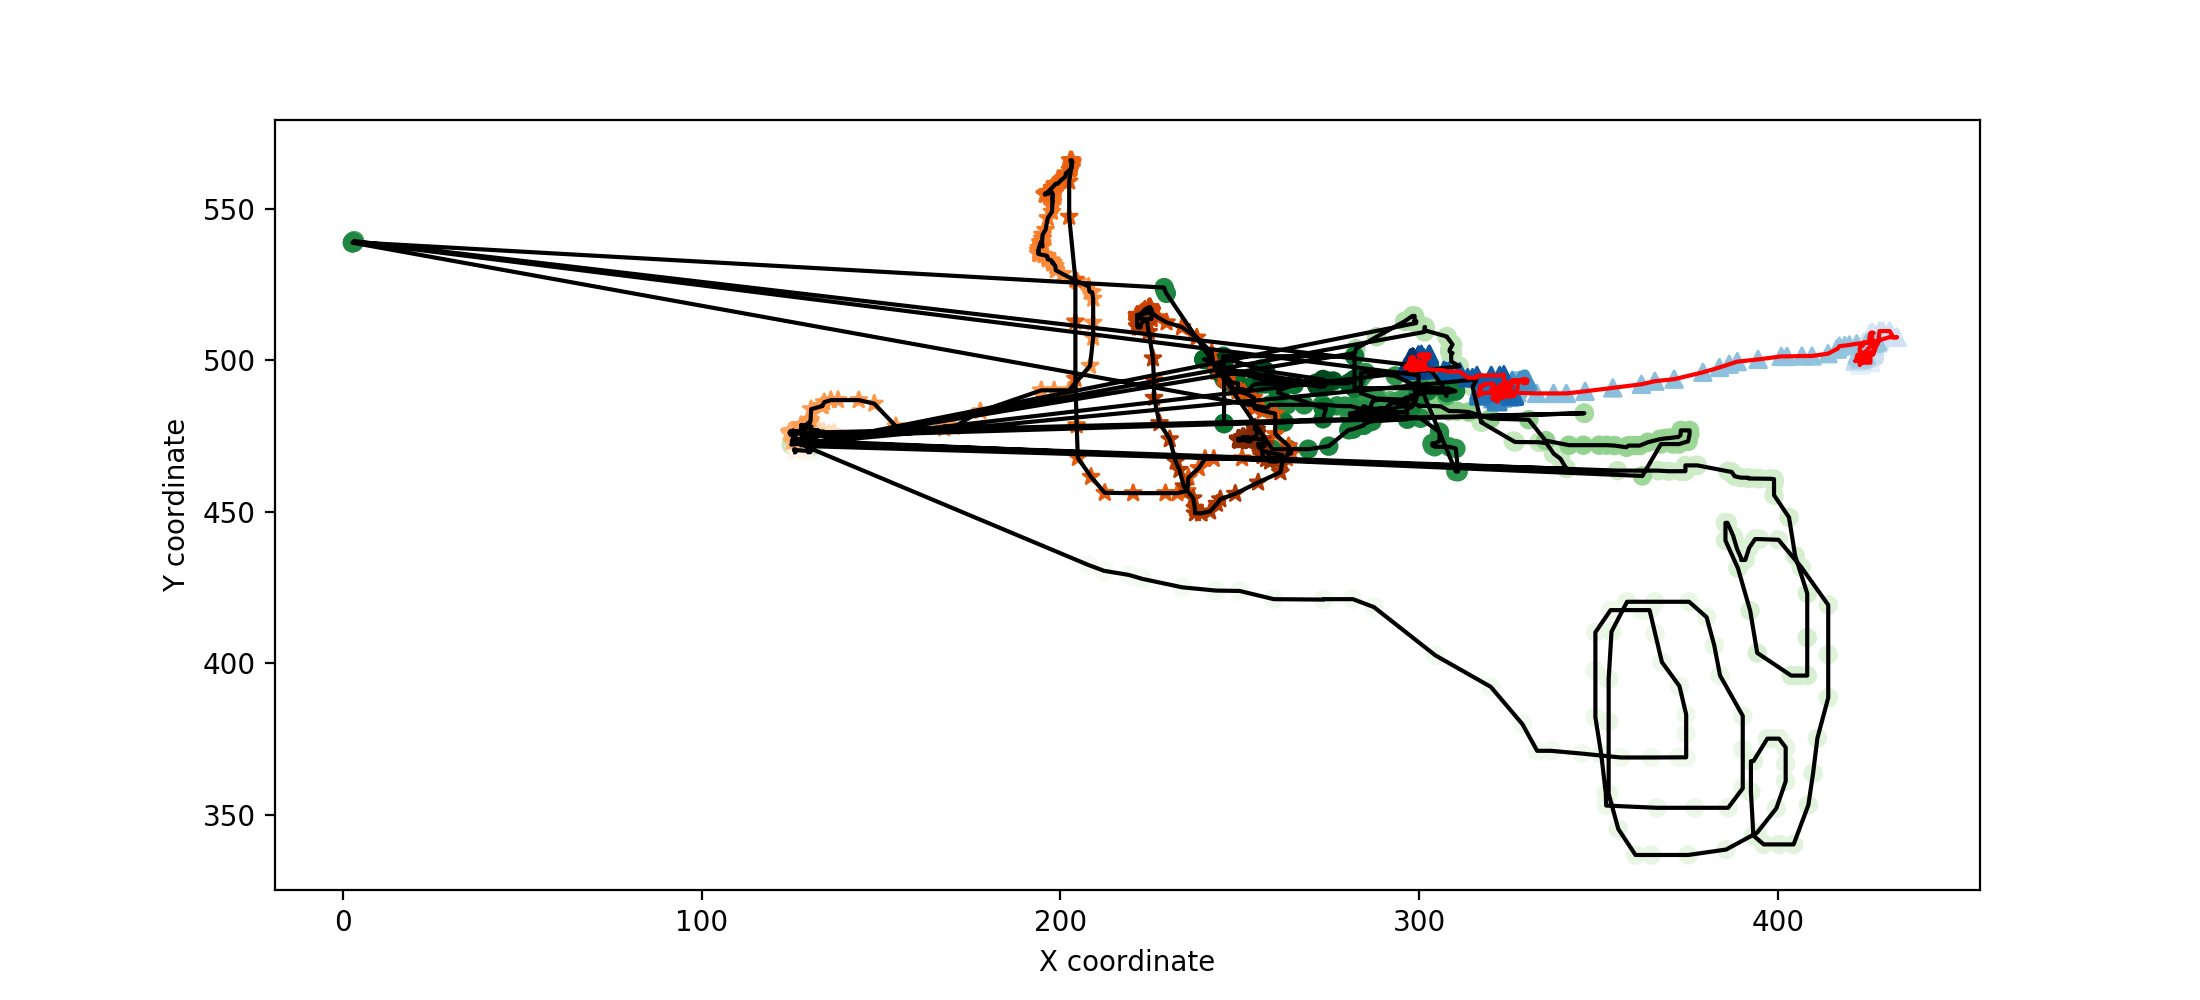

Text(0, 0.5, 'Y coordinate')

In [247]:
#Trial 5

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
cm3 = plt.cm.get_cmap('Oranges')
xx = compare_x['palm1'][16186:16787]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm1'][16186:16787],compare_y['palm1'][16186:16787], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o')
# plt.scatter(compare_x['palm1'][12956:12957],compare_y['palm1'][12956:12957], c = 'g', marker = 'o', label = 'Palm 1')
plt.plot(compare_x['palm1'][16186:16787],compare_y['palm1'][16186:16787], color = 'black')

plt.scatter(compare_x['palm2'][16186:16787],compare_y['palm2'][16186:16787], c = c,vmin=0, vmax=len(xx), cmap=cm3, marker = '*')
# plt.scatter(compare_x['palm2'][12956:12957],compare_y['palm2'][12956:12957], c = '#FFA500', marker = '*', label = 'Palm 2')
plt.plot(compare_x['palm2'][16186:16787],compare_y['palm2'][16186:16787], color = 'black')

plt.scatter(compare_x['handle'][16186:16787],compare_y['handle'][16186:16787], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = '^')
# plt.scatter(compare_x['handle'][12956:12957],compare_y['handle'][12956:12957], c = 'b', marker = '^', label = 'Handle')
plt.plot(compare_x['handle'][16186:16787],compare_y['handle'][16186:16787], color = 'red')
# plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

<IPython.core.display.Javascript object>


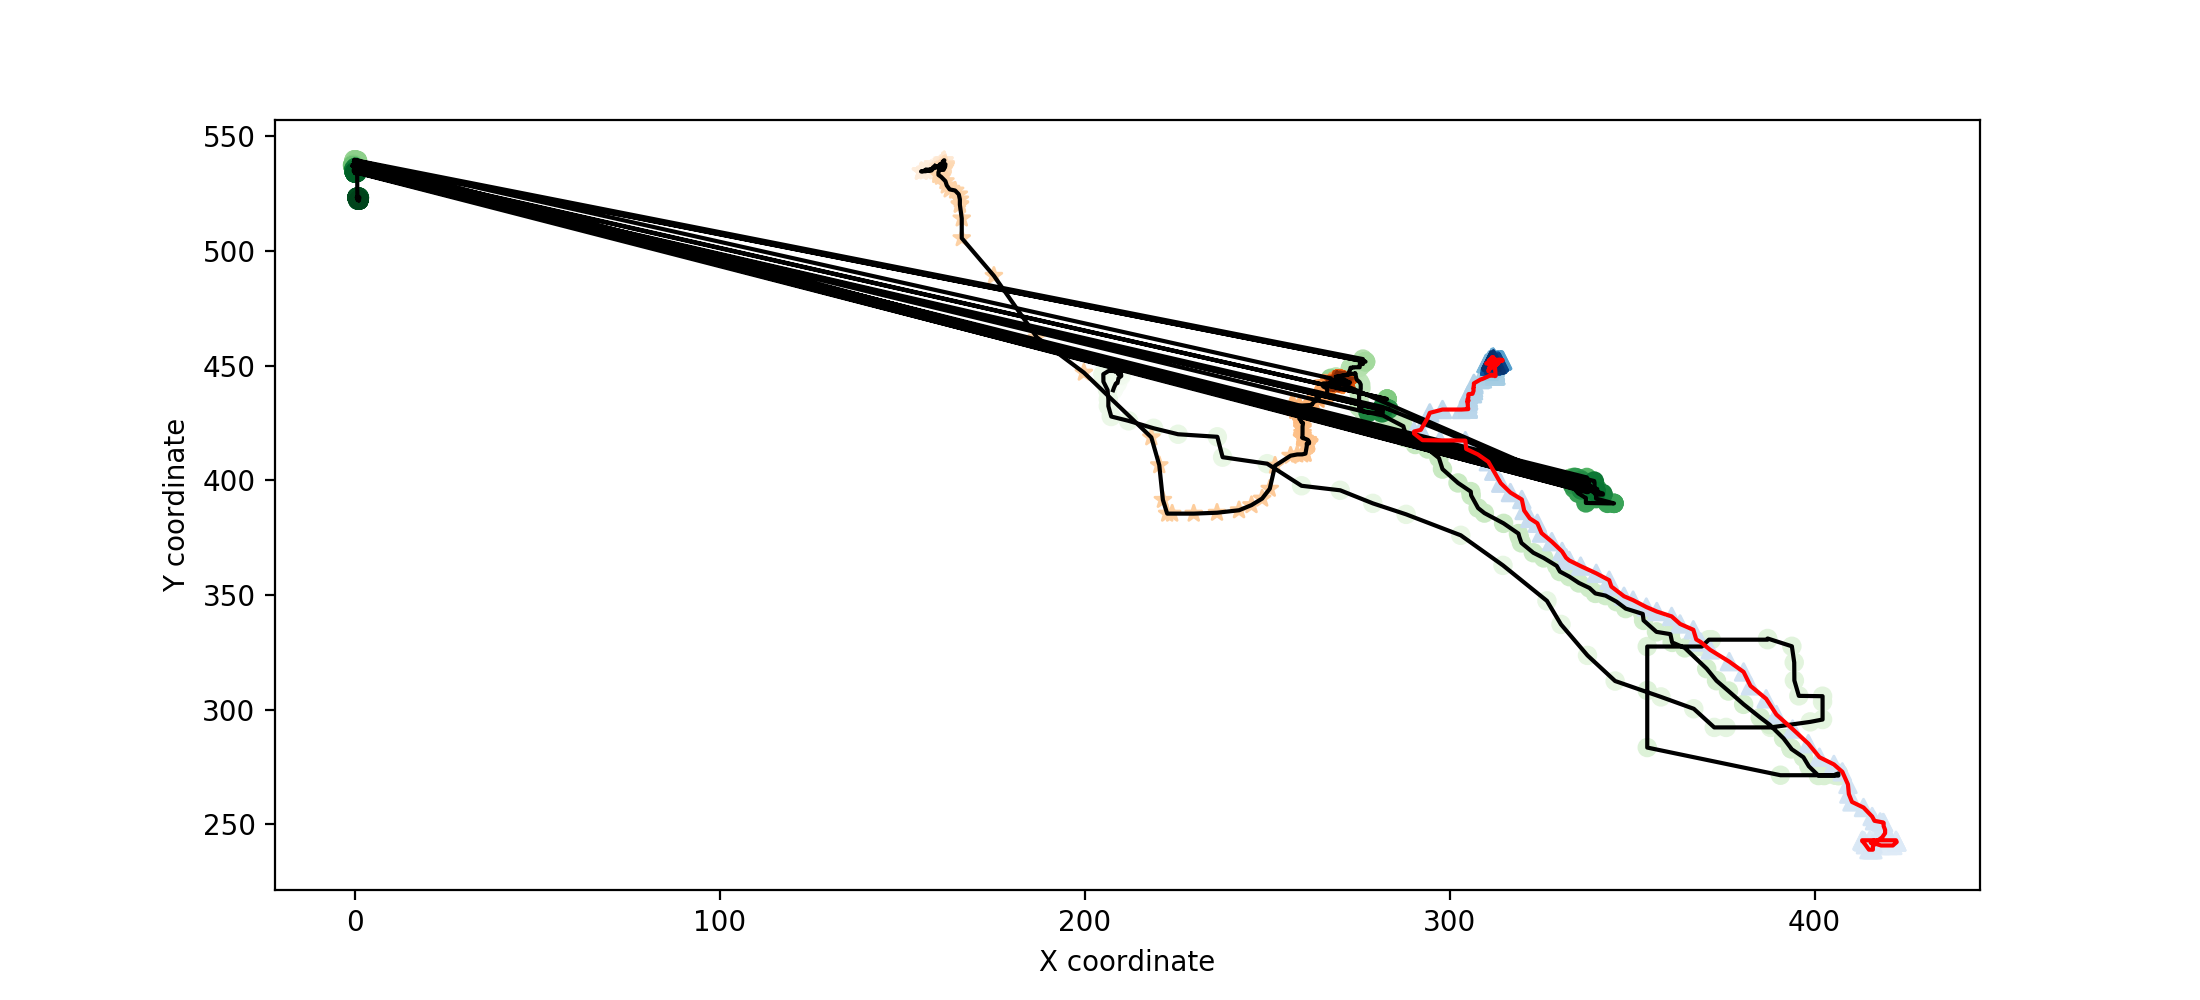

Text(0, 0.5, 'Y coordinate')

In [249]:
#Trial 6

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
cm3 = plt.cm.get_cmap('Oranges')
xx = compare_x['palm1'][17211:17765]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm1'][17211:17765],compare_y['palm1'][17211:17765], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o')
# plt.scatter(compare_x['palm1'][12956:12957],compare_y['palm1'][12956:12957], c = 'g', marker = 'o', label = 'Palm 1')
plt.plot(compare_x['palm1'][17211:17765],compare_y['palm1'][17211:17765], color = 'black')

plt.scatter(compare_x['palm2'][17211:17765],compare_y['palm2'][17211:17765], c = c,vmin=0, vmax=len(xx), cmap=cm3, marker = '*')
# plt.scatter(compare_x['palm2'][12956:12957],compare_y['palm2'][12956:12957], c = '#FFA500', marker = '*', label = 'Palm 2')
plt.plot(compare_x['palm2'][17211:17765],compare_y['palm2'][17211:17765], color = 'black')

plt.scatter(compare_x['handle'][17211:17765],compare_y['handle'][17211:17765], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = '^')
# plt.scatter(compare_x['handle'][12956:12957],compare_y['handle'][12956:12957], c = 'b', marker = '^', label = 'Handle')
plt.plot(compare_x['handle'][17211:17765],compare_y['handle'][17211:17765], color = 'red')
# plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

<IPython.core.display.Javascript object>


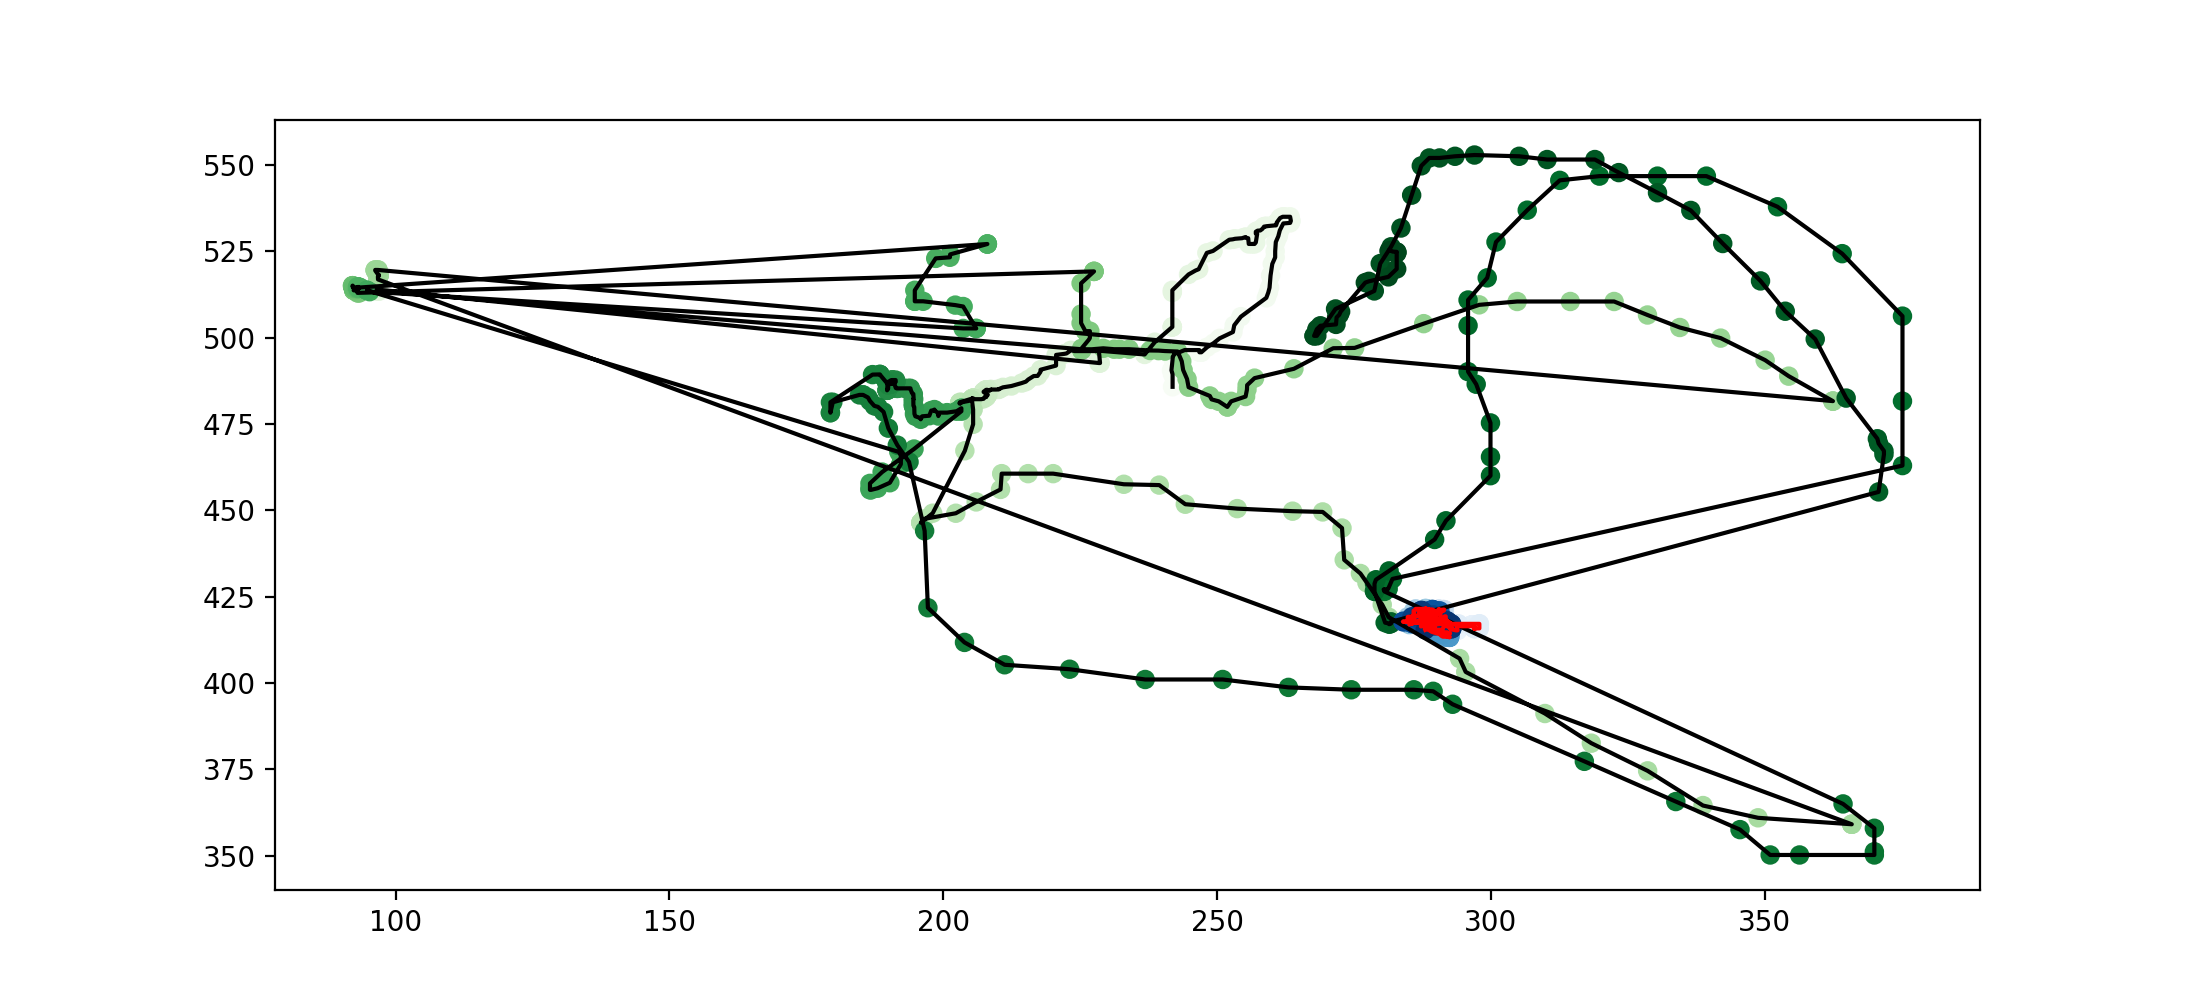

In [231]:
#Trial 10

fig, ax = plt.subplots(figsize = (11,5))
cm = plt.cm.get_cmap('Greens')
cm2 = plt.cm.get_cmap('Blues')
xx = compare_x['palm1'][24110:24682]
frame_axis = range(0,len(xx),1)
c = frame_axis

plt.scatter(compare_x['palm1'][24110:24682],compare_y['palm1'][24110:24682], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o', label = 'Palm')
plt.plot(compare_x['palm1'][24110:24682],compare_y['palm1'][24110:24682], color = 'black')
plt.scatter(compare_x['handle'][24110:24682],compare_y['handle'][24110:24682], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = 'o', label = 'Handle')
plt.plot(compare_x['handle'][24110:24682],compare_y['handle'][24110:24682], color = 'red')


## Classifier

In [69]:
prob_handle = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.2']
prob_nose = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.8']
prob_palm1 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.20']
prob_palm2 = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.56']

handle_x = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012']
palm1_x = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.18']
palm2_x = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.54']

handle_y = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.1']
palm1_y = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.19']
palm2_y = dlc_csv['DLC_resnet101_CatScanJul27shuffle5_600012.55']

In [72]:
trials_frames.head()

start   stop start_s  stop_s  Rodent Present  Rodent Arm Reach
0   2753   3317  110.12  132.68            True              True
1   5546   6038     221     241           False             False
2   7771   8414     310     336           False             False
3  12174  12957  486.96  518.28            True              True
4  14881  15401  595.24  616.04            True              True

In [74]:
trials_frames['Rodent Present'] = trials_frames['Rodent Present'].astype(int)
trials_frames['Rodent Arm Reach'] = trials_frames['Rodent Arm Reach'].astype(int)

In [75]:
trials_frames.head()

start   stop start_s  stop_s  Rodent Present  Rodent Arm Reach
0   2753   3317  110.12  132.68               1                 1
1   5546   6038     221     241               0                 0
2   7771   8414     310     336               0                 0
3  12174  12957  486.96  518.28               1                 1
4  14881  15401  595.24  616.04               1                 1

In [76]:
trials_frames['frac_nose'] = trials_frames['start']
trials_frames['nose_minmax'] = trials_frames['start']
trials_frames['frac_handle'] = trials_frames['start']

In [77]:
for i in range(len(trials_frames)):
    df_try1 = prob_nose[trials_frames['start'][i]:trials_frames['stop'][i]]
    df_try2 = prob_handle[trials_frames['start'][i]:trials_frames['stop'][i]]
    trials_frames['frac_nose'][i] = df_try1[df_try1>0.9995].count()/df_try1.count()
    trials_frames['frac_handle'][i] = df_try2[df_try2>0.9].count()/df_try2.count()
    trials_frames['nose_minmax'][i] = df_try1.max()+df_try1.min()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
trials_frames.head()

start   stop start_s  stop_s  Rodent Present  Rodent Arm Reach frac_nose  \
0   2753   3317  110.12  132.68               1                 1  0.131206   
1   5546   6038     221     241               0                 0         0   
2   7771   8414     310     336               0                 0         0   
3  12174  12957  486.96  518.28               1                 1  0.997446   
4  14881  15401  595.24  616.04               1                 1         1   

  nose_minmax frac_handle  
0      1.0015           1  
1   0.0040817           1  
2  0.00448459           1  
3     1.99927           1  
4     1.99963           1

In [79]:
trials_frames['handle_minmax_x'] = trials_frames['start']
trials_frames['handle_minmax_y'] = trials_frames['start']

In [80]:
for i in range(len(trials_frames)):
    df_try1 = handle_x[trials_frames['start'][i]:trials_frames['stop'][i]]
    df_try2 = handle_y[trials_frames['start'][i]:trials_frames['stop'][i]]
    trials_frames['handle_minmax_x'][i] = df_try1.max()-df_try1.min()
    trials_frames['handle_minmax_y'][i] = df_try2.max()-df_try2.min()
trials_frames.head()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


start   stop start_s  stop_s  Rodent Present  Rodent Arm Reach frac_nose  \
0   2753   3317  110.12  132.68               1                 1  0.131206   
1   5546   6038     221     241               0                 0         0   
2   7771   8414     310     336               0                 0         0   
3  12174  12957  486.96  518.28               1                 1  0.997446   
4  14881  15401  595.24  616.04               1                 1         1   

  nose_minmax frac_handle handle_minmax_x handle_minmax_y  
0      1.0015           1         4.71701          3.1311  
1   0.0040817           1         2.14322         1.07489  
2  0.00448459           1         1.20319        0.947937  
3     1.99927           1         99.4828         16.9915  
4     1.99963           1         99.6993         69.2286

In [81]:
trials_frames['palm1_minmax_x'] = trials_frames['start']
trials_frames['palm1_minmax_y'] = trials_frames['start']
trials_frames['frac_palm1'] = trials_frames['start']
trials_frames['palm2_minmax_x'] = trials_frames['start']
trials_frames['palm2_minmax_y'] = trials_frames['start']
trials_frames['frac_palm2'] = trials_frames['start']

In [82]:
for i in range(len(trials_frames)):
    df_try1 = palm1_x[trials_frames['start'][i]:trials_frames['stop'][i]]
    df_try2 = palm1_y[trials_frames['start'][i]:trials_frames['stop'][i]]
    df_try3 = prob_palm1[trials_frames['start'][i]:trials_frames['stop'][i]]
    trials_frames['palm1_minmax_x'][i] = df_try1.max()-df_try1.min()
    trials_frames['palm1_minmax_y'][i] = df_try2.max()-df_try2.min()
    trials_frames['frac_palm1'][i] = df_try3[df_try3>0.999].count()/df_try3.count()
    
    df_try1 = palm2_x[trials_frames['start'][i]:trials_frames['stop'][i]]
    df_try2 = palm2_y[trials_frames['start'][i]:trials_frames['stop'][i]]
    df_try3 = prob_palm2[trials_frames['start'][i]:trials_frames['stop'][i]]
    trials_frames['palm2_minmax_x'][i] = df_try1.max()-df_try1.min()
    trials_frames['palm2_minmax_y'][i] = df_try2.max()-df_try2.min()
    trials_frames['frac_palm2'][i] = df_try3[df_try3>0.999].count()/df_try3.count()
trials_frames.head()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/ipykernel_launche

start   stop start_s  stop_s  Rodent Present  Rodent Arm Reach frac_nose  \
0   2753   3317  110.12  132.68               1                 1  0.131206   
1   5546   6038     221     241               0                 0         0   
2   7771   8414     310     336               0                 0         0   
3  12174  12957  486.96  518.28               1                 1  0.997446   
4  14881  15401  595.24  616.04               1                 1         1   

  nose_minmax frac_handle handle_minmax_x handle_minmax_y palm1_minmax_x  \
0      1.0015           1         4.71701          3.1311        685.956   
1   0.0040817           1         2.14322         1.07489        47.3839   
2  0.00448459           1         1.20319        0.947937        47.3127   
3     1.99927           1         99.4828         16.9915        358.706   
4     1.99963           1         99.6993         69.2286        219.425   

  palm1_minmax_y  frac_palm1 palm2_minmax_x palm2_minmax_y frac_palm2  
0        134.549  0.00531915        398.229        143.567          0  
1        15.5917           0         1.1301        1.05859          0  
2        15.2302           0       0.511047       0.680237          0  
3        127.161    0.509579        46.9889        60.4682   0.641124  
4        167.129       0.625         62.393        99.6656  0.0788462

In [83]:
df = trials_frames.drop('start', axis = 1)
df = df.drop('stop', axis = 1)
df = df.drop('start_s', axis = 1)
df = df.drop('stop_s', axis = 1)
df

Rodent Present  Rodent Arm Reach frac_nose nose_minmax frac_handle  \
0                1                 1  0.131206      1.0015           1   
1                0                 0         0   0.0040817           1   
2                0                 0         0  0.00448459           1   
3                1                 1  0.997446     1.99927           1   
4                1                 1         1     1.99963           1   
5                1                 1   0.97005     1.97258    0.991681   
6                1                 1  0.904332     1.99424    0.990975   
7                1                 1  0.991409      1.9985    0.948454   
8                0                 0         0  0.00296247           1   
9                1                 1         1      1.9997           1   
10               1                 1  0.811189     1.01566    0.865385   
11               1                 1   0.78125     1.00177    0.995924   
12               1                 1  0.588129     1.00303    0.998201   
13               1                 1  0.920213     1.00159           1   
14               1                 0  0.101064      1.0011           1   
15               1                 0  0.807623     1.18566           1   
16               1                 1  0.772152     1.00099           1   
17               1                 0   0.98915     1.99905           1   
18               1                 0  0.945423     1.99242           1   
19               1                 0  0.307282     1.00082           1   
20               1                 1  0.994941     1.99856           1   
21               1                 1  0.952813      1.9498    0.744102   
22               1                 1  0.998452     1.99827           1   
23               1                 1  0.881508     1.42377           1   
24               1                 1  0.968028     1.99253    0.818828   
25               1                 1   0.91921     1.99377           1   
26               1                 1  0.633274     1.00218    0.992844   
27               1                 1  0.998217     1.99946    0.187166   
28               1                 1  0.548043     1.00219           1   
29               1                 1  0.966011     1.99597    0.998211   
30               1                 1  0.982839      1.9929    0.934477   
31               1                 1  0.774423     1.08989    0.868561   
32               0                 0         0  0.00402856           1   
33               1                 0  0.822917     1.97401           1   
34               1                 1  0.929577      1.9767           1   
35               1                 1  0.909753      1.8376           1   
36               1                 1  0.956672     1.35195           1   
37               1                 1  0.968815     1.99046    0.981289   
38               1                 1  0.893651     1.49648    0.988889   
39               1                 1    0.9374     1.90404           1   
40               1                 1  0.373473     1.00153    0.975567   
41               1                 1   0.95979     1.99191    0.984266   
42               1                 1  0.819444     1.01773    0.432292   
43               1                 1  0.926829     1.98022           1   
44               1                 1         1     1.99974           1   
45               1                 1         1     1.99959    0.991274   
46               1                 1  0.322183      1.0012    0.994718   
47               1                 1  0.964286     1.95423           1   
48               1                 1  0.834483     1.40116    0.917241   
49               1                 1  0.946181       1.994    0.232639   
50               1                 1  0.955036     1.91078    0.969424   
51               1                 1  0.994024     1.99819    0.834661   
52               1                 1  0.960212     1.85415     0.98939   
53      

In [85]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

<IPython.core.display.Javascript object>


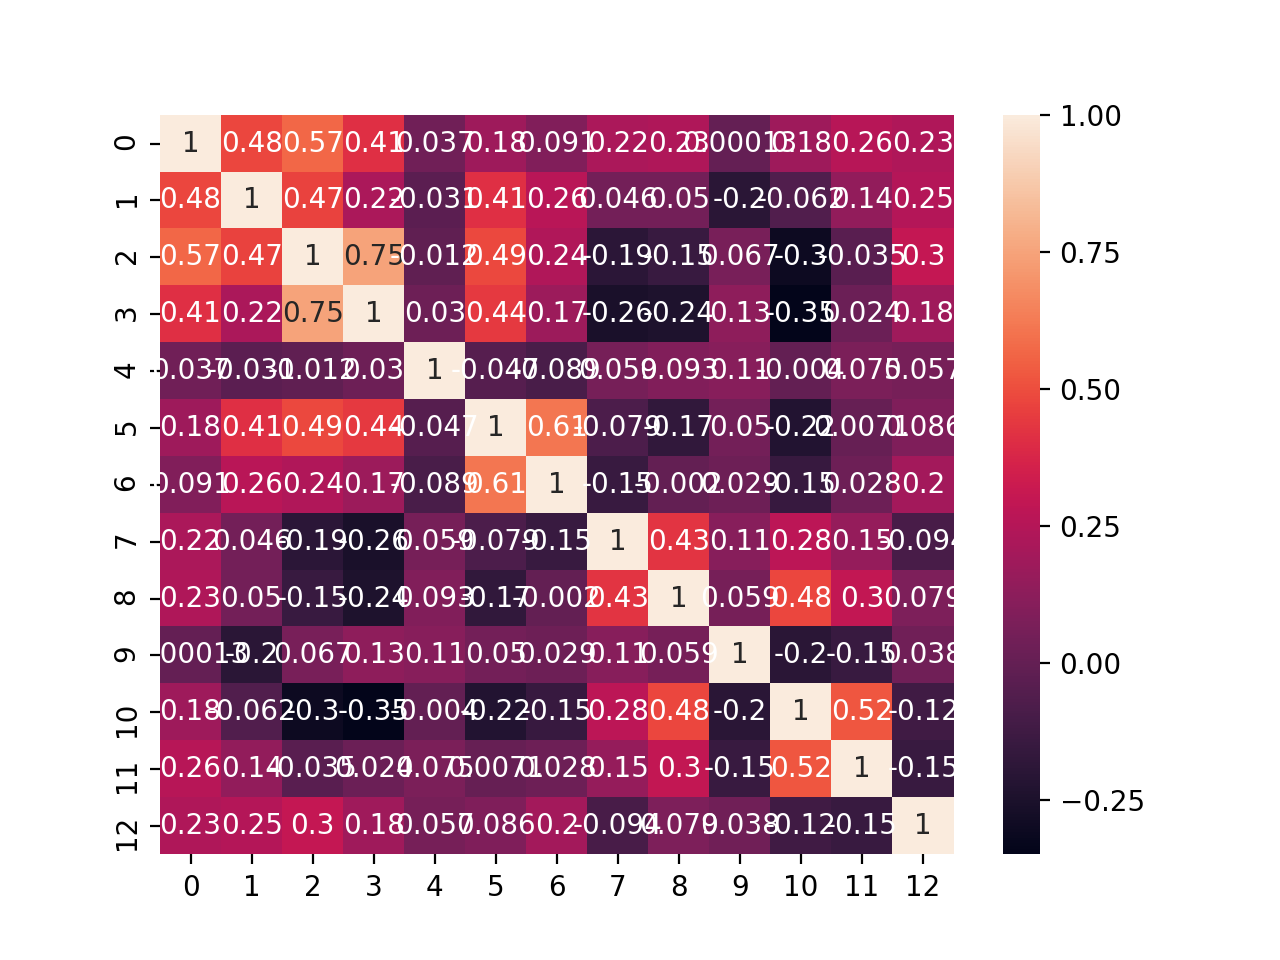

In [86]:
corrMatrix = normalized_df.corr()
plt.figure()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<IPython.core.display.Javascript object>


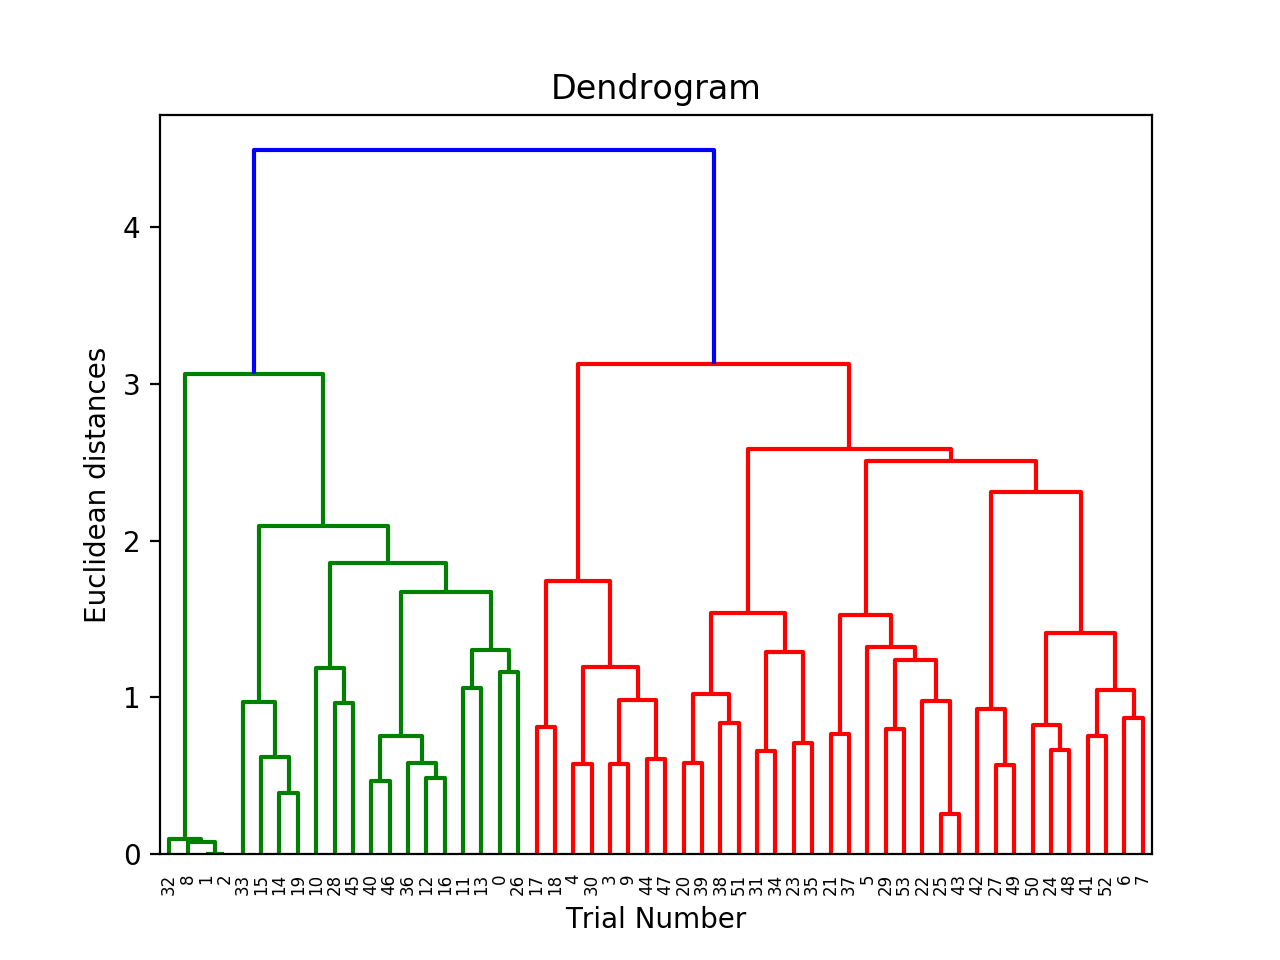

In [87]:
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(normalized_df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Trial Number')
plt.ylabel('Euclidean distances')
plt.show()

<IPython.core.display.Javascript object>


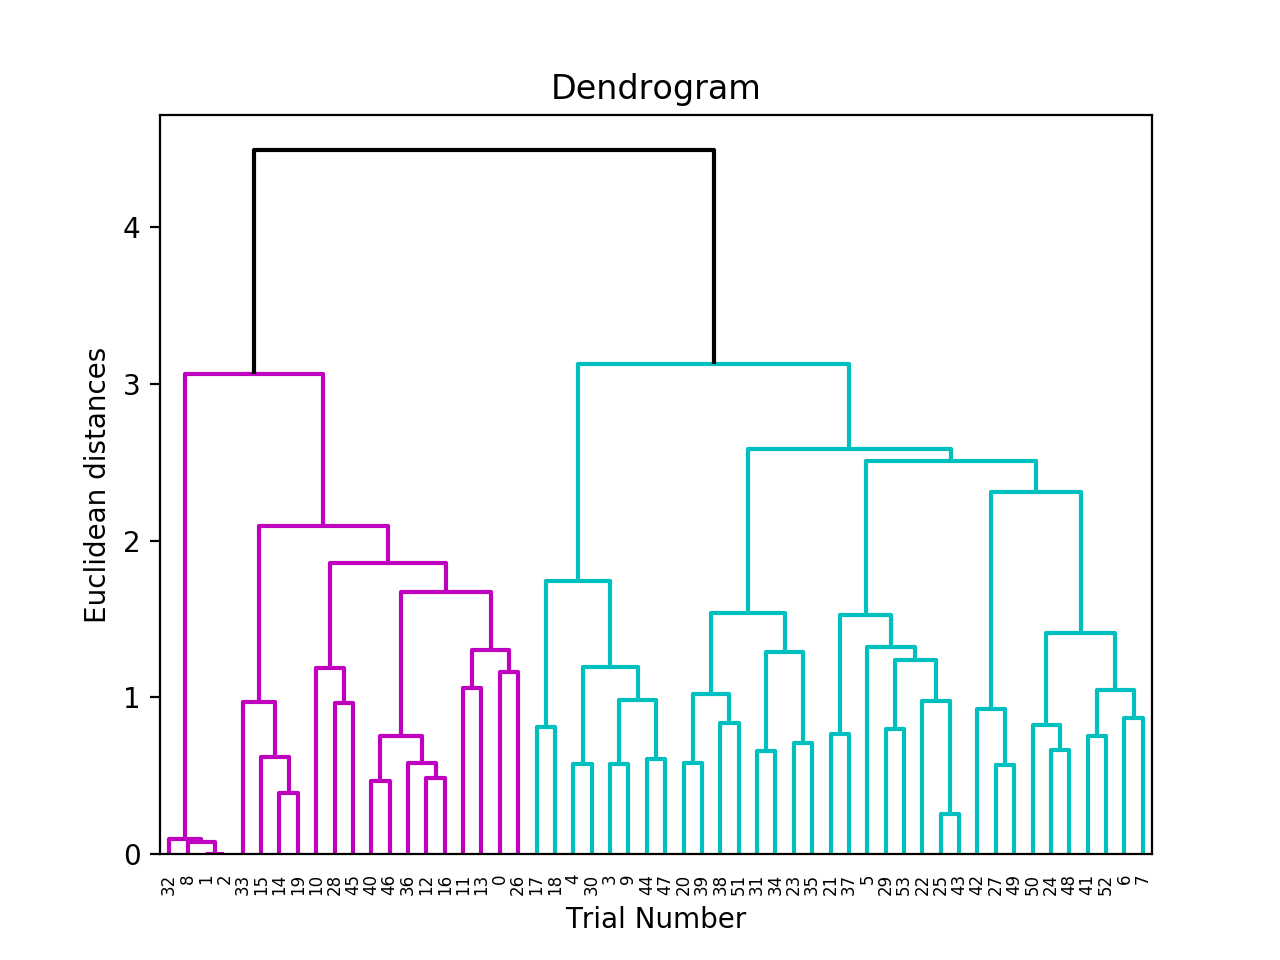

In [95]:
sch.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(normalized_df, method  = "ward"), above_threshold_color='black')
plt.title('Dendrogram')
plt.xlabel('Trial Number')
plt.ylabel('Euclidean distances')
sch.set_link_color_palette(None)
plt.show()

<IPython.core.display.Javascript object>


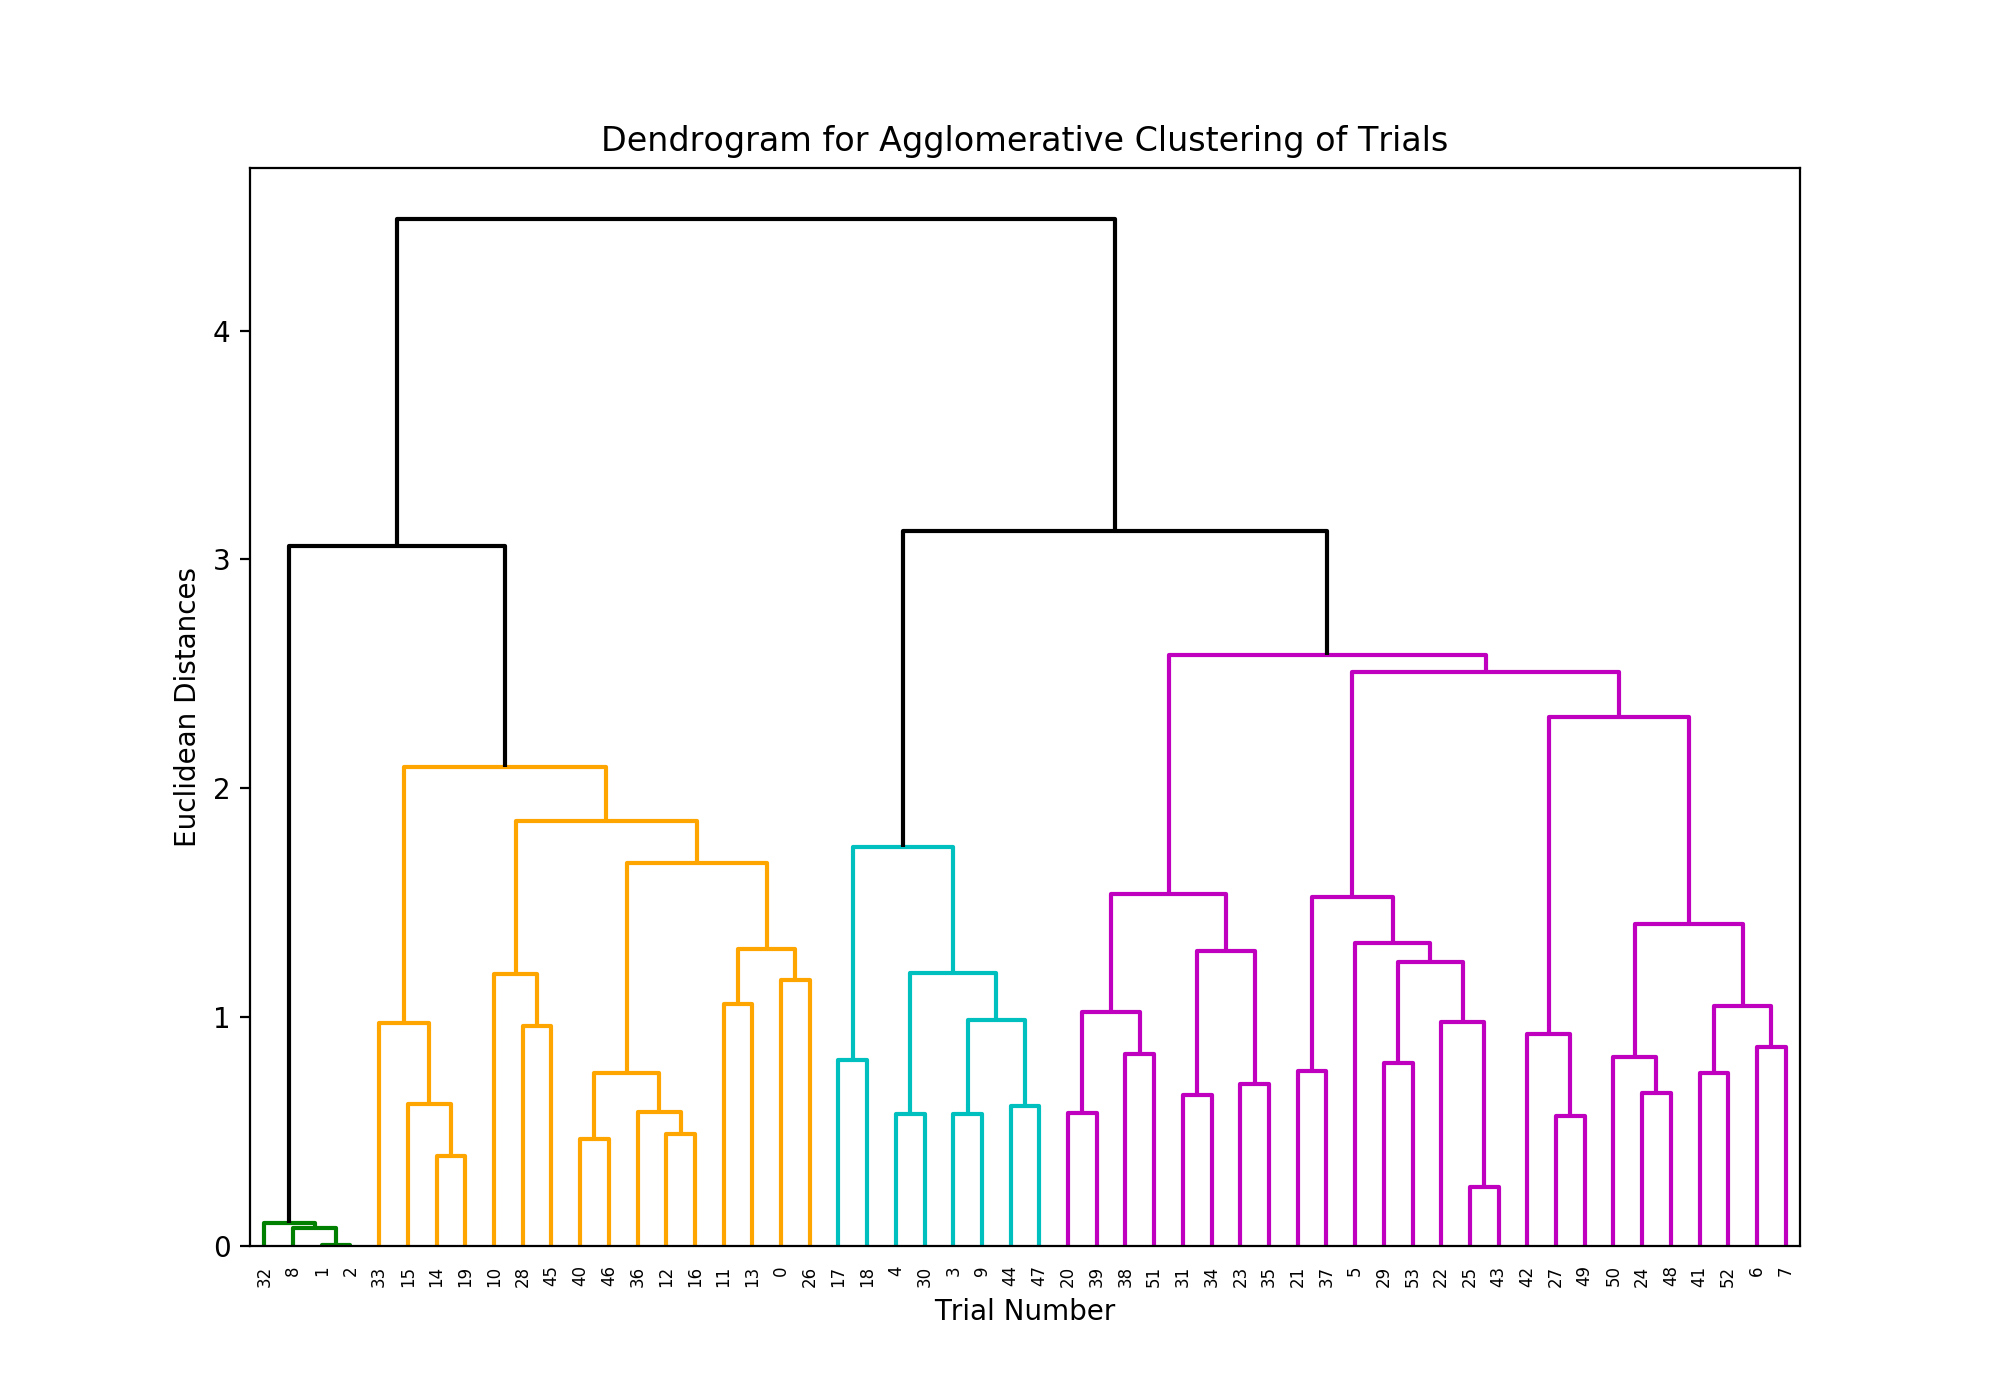

In [137]:
sch.set_link_color_palette(['g', 'orange', 'c', 'm'])
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(normalized_df, method  = "ward"),color_threshold = 2.9, above_threshold_color='black')
plt.title('Dendrogram for Agglomerative Clustering of Trials')
plt.xlabel('Trial Number')
plt.ylabel('Euclidean Distances')
sch.set_link_color_palette(None)
plt.show()

In [265]:
# # For legend

# fig, ax = plt.subplots(figsize = (10,5))
# cm = plt.cm.get_cmap('Greens')
# cm2 = plt.cm.get_cmap('Blues')
# cm3 = plt.cm.get_cmap('Oranges')
# xx = compare_x['palm1'][12174:12957]
# frame_axis = range(0,len(xx),1)
# c = frame_axis

# # plt.scatter(compare_x['palm1'][12174:12957],compare_y['palm1'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm, marker = 'o')
# plt.scatter(compare_x['palm1'][12174:12957],compare_y['palm1'][12174:12957], c = 'g', marker = 's', label = 'NULL Trial')
# # plt.plot(compare_x['palm1'][12174:12957],compare_y['palm1'][12174:12957], color = 'black')

# plt.scatter(compare_x['palm1'][12174:12957],compare_y['palm1'][12174:12957], c = 'tab:orange', marker = 's', label = 'Failed Arm Reach')
# # plt.scatter(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm3, marker = '*')
# plt.scatter(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], c = 'c', marker = 's', label = 'Single Arm Reach')
# # plt.plot(compare_x['palm2'][12174:12957],compare_y['palm2'][12174:12957], color = 'black')

# # plt.scatter(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], c = c,vmin=0, vmax=len(xx), cmap=cm2, marker = '^')
# plt.scatter(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], c = 'm', marker = 's', label = 'Bimanual Arm Reach')
# # plt.plot(compare_x['handle'][12174:12957],compare_y['handle'][12174:12957], color = 'red')
# plt.legend()
# plt.xlabel('X coordinate')
# plt.ylabel('Y coordinate')

In [105]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [106]:
y_hc=hc.fit_predict(normalized_df)

In [124]:
df['labels'] = y_hc
df = df.sort_values(by=['labels'])

In [125]:
df

index  Rodent Present  Rodent Arm Reach frac_nose nose_minmax frac_handle  \
53     53               1                 1  0.869338     1.98507           1   
27     27               1                 1  0.998217     1.99946    0.187166   
52     52               1                 1  0.960212     1.85415     0.98939   
25     25               1                 1   0.91921     1.99377           1   
24     24               1                 1  0.968028     1.99253    0.818828   
23     23               1                 1  0.881508     1.42377           1   
22     22               1                 1  0.998452     1.99827           1   
21     21               1                 1  0.952813      1.9498    0.744102   
20     20               1                 1  0.994941     1.99856           1   
34     34               1                 1  0.929577      1.9767           1   
35     35               1                 1  0.909753      1.8376           1   
37     37               1                 1  0.968815     1.99046    0.981289   
29     29               1                 1  0.966011     1.99597    0.998211   
39     39               1                 1    0.9374     1.90404           1   
38     38               1                 1  0.893651     1.49648    0.988889   
41     41               1                 1   0.95979     1.99191    0.984266   
42     42               1                 1  0.819444     1.01773    0.432292   
43     43               1                 1  0.926829     1.98022           1   
7       7               1                 1  0.991409      1.9985    0.948454   
6       6               1                 1  0.904332     1.99424    0.990975   
5       5               1                 1   0.97005     1.97258    0.991681   
48     48               1                 1  0.834483     1.40116    0.917241   
49     49               1                 1  0.946181       1.994    0.232639   
50     50               1                 1  0.955036     1.91078    0.969424   
51     51               1                 1  0.994024     1.99819    0.834661   
31     31               1                 1  0.774423     1.08989    0.868561   
36     36               1                 1  0.956672     1.35195           1   
45     45               1                 1         1     1.99959    0.991274   
46     46               1                 1  0.322183      1.0012    0.994718   
33     33               1                 0  0.822917     1.97401           1   
40     40               1                 1  0.373473     1.00153    0.975567   
0       0               1                 1  0.131206      1.0015           1   
11     11               1                 1   0.78125     1.00177    0.995924   
10     10               1                 1  0.811189     1.01566    0.865385   
12     12               1                 1  0.588129     1.00303    0.998201   
13     13               1                 1  0.920213     1.00159           1   
14     14               1                 0  0.101064      1.0011           1   
15     15               1                 0  0.807623     1.18566           1   
26     26               1                 1  0.633274     1.00218    0.992844   
19     19               1                 0  0.307282     1.00082           1   
28     28               1                 1  0.548043     1.00219           1   
16     16               1                 1  0.772152     1.00099           1   
17     17               1                 0   0.98915     1.99905           1   
18     18               1                 0  0.945423     1.99242           1   
30     30               1                 1  0.982839      1.9929    0.934477   
44     44               1                 1         1     1.99974           1   
9       9               1                 1         1      1.9997           1   
47     47               1                 1  0.964286     1.95423           1   
4       4               1          

In [117]:
# df.reset_index(inplace=True)

In [119]:
df.head()

index  Rodent Present  Rodent Arm Reach frac_nose nose_minmax frac_handle  \
0      0               1                 1  0.131206      1.0015           1   
1      1               0                 0         0   0.0040817           1   
2      2               0                 0         0  0.00448459           1   
3      3               1                 1  0.997446     1.99927           1   
4      4               1                 1         1     1.99963           1   

  handle_minmax_x handle_minmax_y palm1_minmax_x palm1_minmax_y  frac_palm1  \
0         4.71701          3.1311        685.956        134.549  0.00531915   
1         2.14322         1.07489        47.3839        15.5917           0   
2         1.20319        0.947937        47.3127        15.2302           0   
3         99.4828         16.9915        358.706        127.161    0.509579   
4         99.6993         69.2286        219.425        167.129       0.625   

  palm2_minmax_x palm2_minmax_y frac_palm2  labels  
0        398.229        143.567          0       0  
1         1.1301        1.05859          0       0  
2       0.511047       0.680237          0       0  
3        46.9889        60.4682   0.641124       0  
4         62.393        99.6656  0.0788462       0

In [126]:
classified_df = pd.DataFrame()

In [127]:
classified_df['Trial Number'] = df['index']

In [128]:
classified_df.head()

Trial Number
53            53
27            27
52            52
25            25
24            24

In [129]:
classified_df['Cluster Number'] = df['labels']

In [132]:
classified_df.sort_values(by=['Cluster Number','Trial Number'])

Trial Number  Cluster Number
5              5               0
6              6               0
7              7               0
20            20               0
21            21               0
22            22               0
23            23               0
24            24               0
25            25               0
27            27               0
29            29               0
31            31               0
34            34               0
35            35               0
37            37               0
38            38               0
39            39               0
41            41               0
42            42               0
43            43               0
48            48               0
49            49               0
50            50               0
51            51               0
52            52               0
53            53               0
0              0               1
10            10               1
11            11               1
12            12               1
13            13               1
14            14               1
15            15               1
16            16               1
19            19               1
26            26               1
28            28               1
33            33               1
36            36               1
40            40               1
45            45               1
46            46               1
3              3               2
4              4               2
9              9               2
17            17               2
18            18               2
30            30               2
44            44               2
47            47               2
1              1               3
2              2               3
8              8               3
32            32               3